<a href="https://colab.research.google.com/github/nakatoconstance/nakatoconstance/blob/main/Yet_another_copy_of_Neural_Network_Models_October_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import torch

# Set random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [21]:
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.metrics import mean_squared_error, r2_score# importing package for model evaluation
uploaded=files.upload()#C:\Users\USER\OneDrive\Desktop\nakato research\Objective 1 Content\Dataset building\DATASET FOR MODELING HHV\HHV_DATASET_DRY.csv

Saving HHV_DATASET_DRY_final_2.csv to HHV_DATASET_DRY_final_2 (3).csv


In [23]:
data = pd.read_csv('HHV_DATASET_DRY_final_2.csv', encoding='latin-1') # or 'ISO-8859-1', 'cp1252'
data.head()

Unnamed: 0             Biomass   ASH     VM     FC     C    H     O    N  \
0   1.              Alfalfa Stem  5.27  78.92  15.81 47.17 6.00 38.19 2.68   
1   2.          alfalfa (lucern)  9.40   73.9   16.7 45.00 6.00 36.90 2.50   
2   3.        alfalfa seed straw  7.25   72.6  20.15 46.76 5.40 40.72 1.00   
3   4.          cotton gin trash 17.60   67.3   15.1 39.59 5.26 36.38 2.09   
4   5.          cotton gin waste  9.36  82.16   8.48 49.03 4.71 35.08 1.45   

     S   Cel   Hem   Lig  HHV (MJ/kg) Source  
0 0.20   NaN   NaN   NaN        18.67    [1]  
1 2.00   NaN   NaN   NaN        18.60    [2]  
2 0.02   NaN   NaN   NaN        18.45    [2]  
3  NaN 20.00  9.10  17.6        16.42    [2]  
4 0.36 77.80 16.00     0        16.27    [2]

In [24]:
#data.head()
#count missing values
data.isnull().sum()
#compute percentage
data.isnull().sum()/len(data)*100
#display recouds with empty source column
#DISPLAY SOURCE WITH nan
#print(data['Source'].isna())

Unnamed: 0     0.75
Biomass        2.25
ASH            2.62
VM             8.61
FC             8.61
C              3.00
H              5.62
O              5.62
N              5.99
S             25.84
Cel           21.72
Hem           21.72
Lig           20.22
HHV (MJ/kg)    8.61
Source         3.00
dtype: float64

In [25]:
# Assuming 'data' is your DataFrame
cols_to_convert = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Explanation:

sns.jointplot(): This function creates the joint probability distribution plot.
kind='kde': We use kind='kde' to generate a kernel density estimation plot, which shows the distribution of the data as smooth contours. This is better for visualizing outliers compared to a scatter plot or a hexbin plot.
Outlier Visualization: The isolated contours in the plot will indicate the presence of outliers. These are points that are far away from the main concentration of the data.

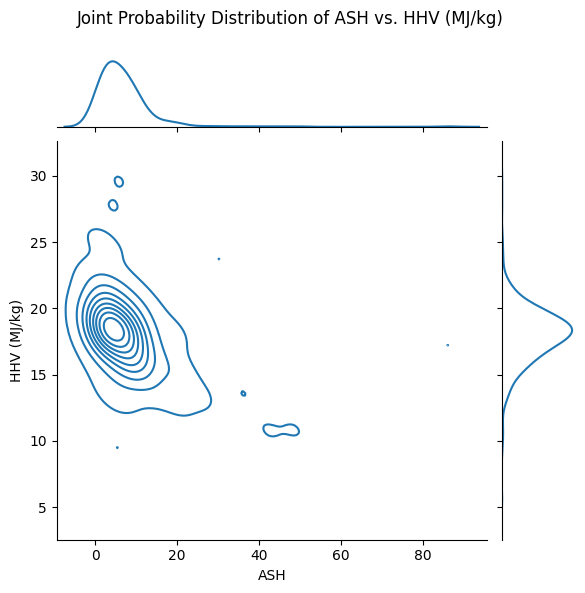

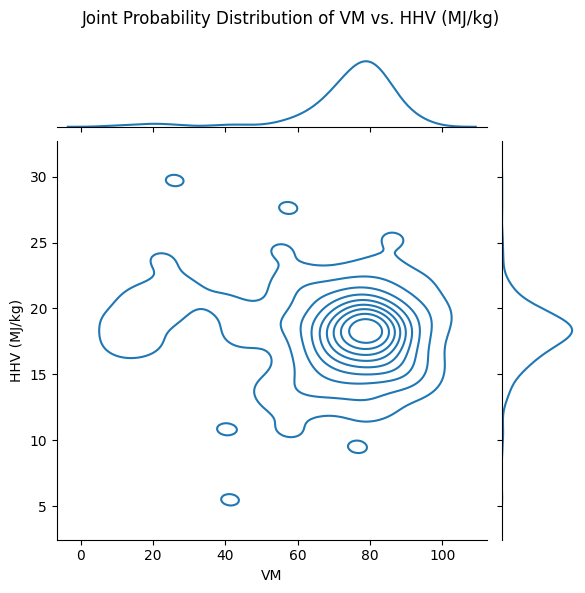

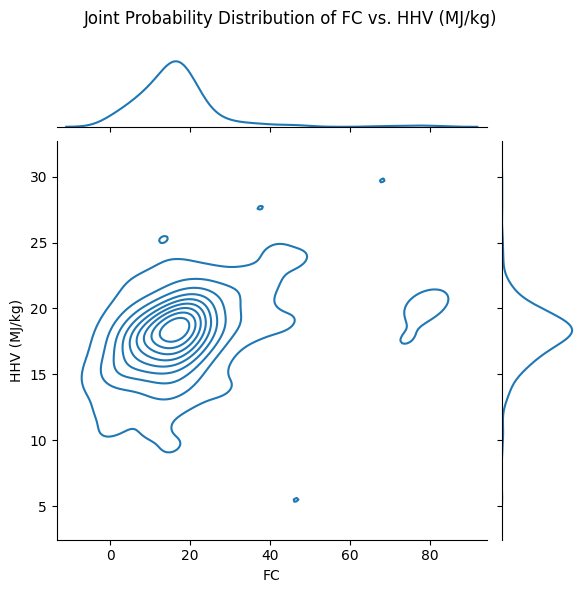

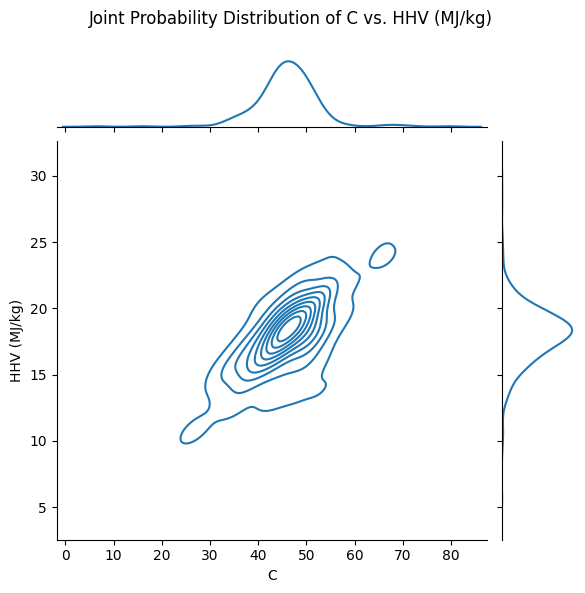

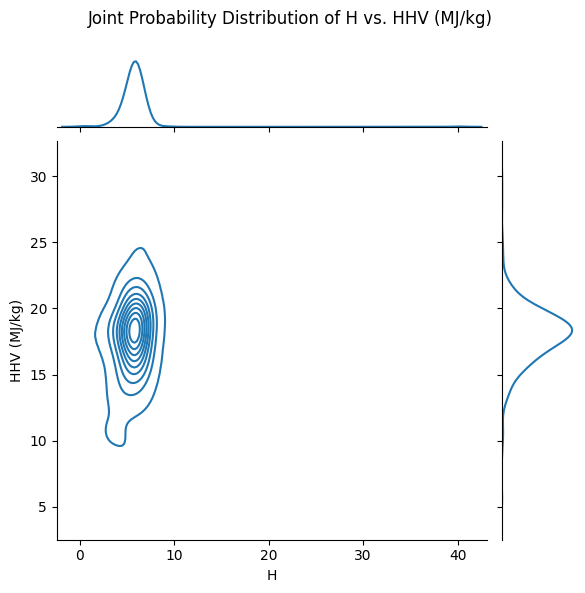

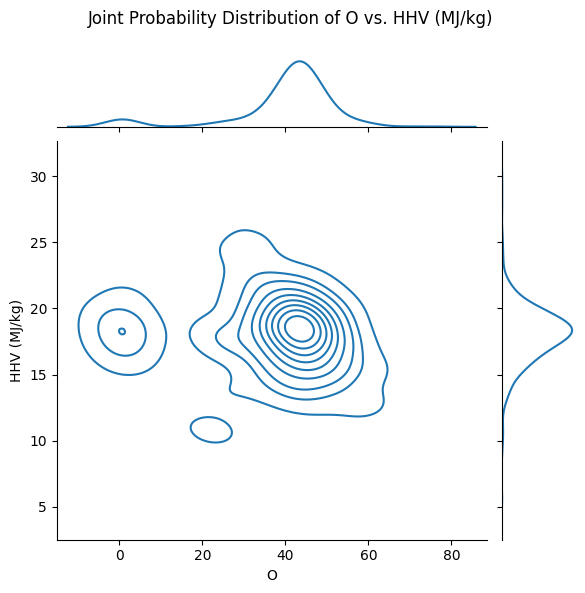

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

#columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O']

for column in columns_to_plot:
    g = sns.jointplot(x=column, y='HHV (MJ/kg)', data=data, kind='kde')
    g.fig.suptitle(f'Joint Probability Distribution of {column} vs. HHV (MJ/kg)')
    plt.subplots_adjust(top=0.9)  # Adjust the top margin to prevent title cutoff
    plt.show()

In [27]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

columns_to_impute = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Create KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data
data_imputed = imputer.fit_transform(data[columns_to_impute])

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=columns_to_impute, index=data.index)

# Normalize to ensure ASH + VM + FC = 100
data_imputed[['ASH', 'VM', 'FC']] = data_imputed[['ASH', 'VM', 'FC']].div(data_imputed[['ASH', 'VM', 'FC']].sum(axis=1), axis=0) * 100

# Normalize to ensure S + H + C + O + N = 100
data_imputed[['S', 'H', 'C', 'O', 'N']] = data_imputed[['S', 'H', 'C', 'O', 'N']].div(data_imputed[['S', 'H', 'C', 'O', 'N']].sum(axis=1), axis=0) * 100

# Replace original columns with imputed and adjusted values
data[columns_to_impute] = data_imputed[columns_to_impute]

# Now 'data' has missing values filled using KNN imputation and sums adjusted to 100


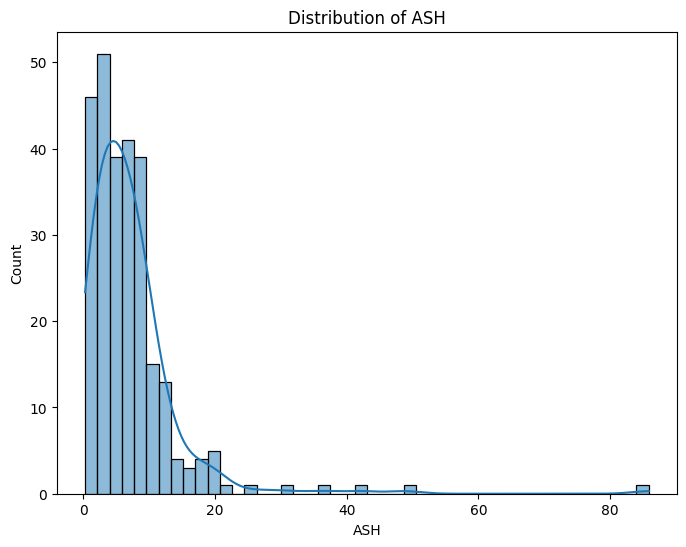

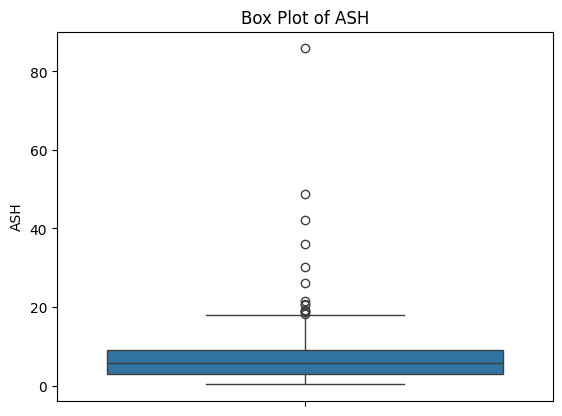

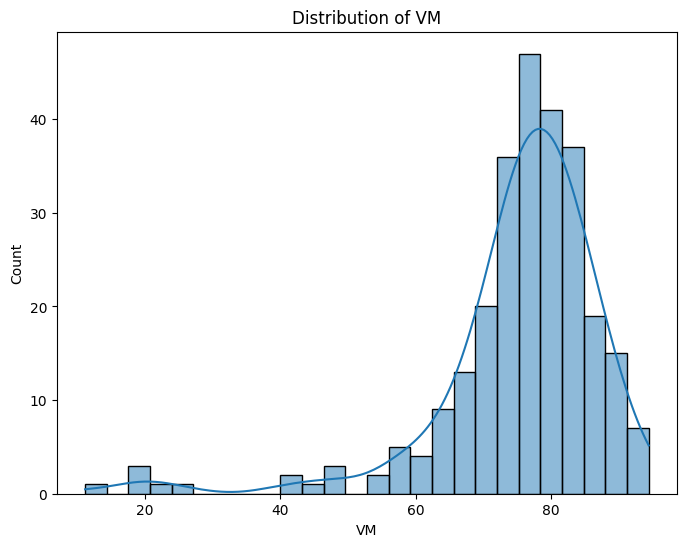

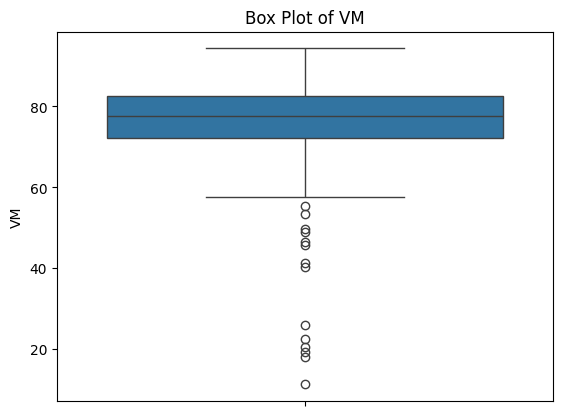

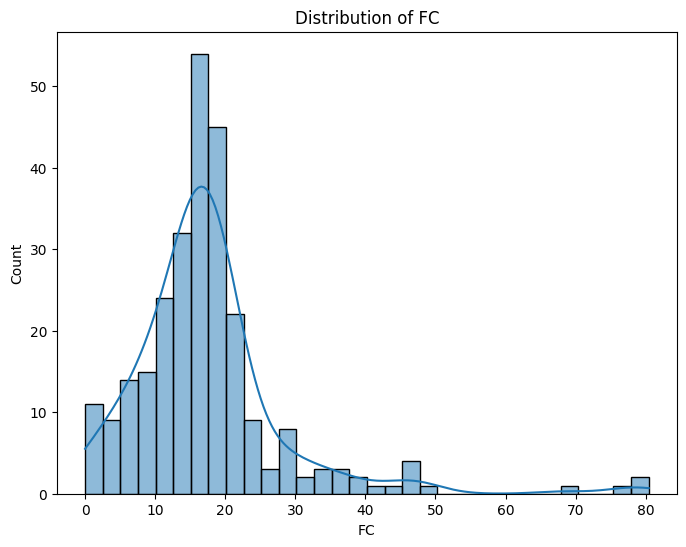

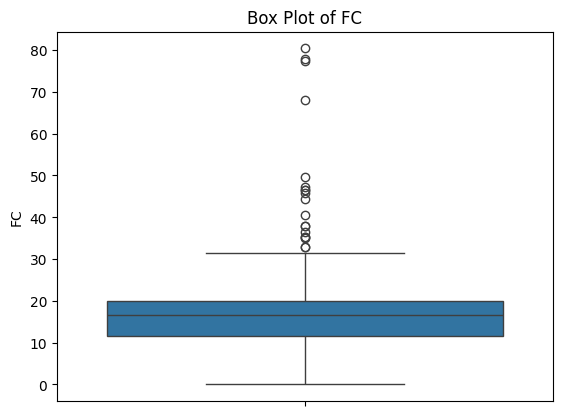

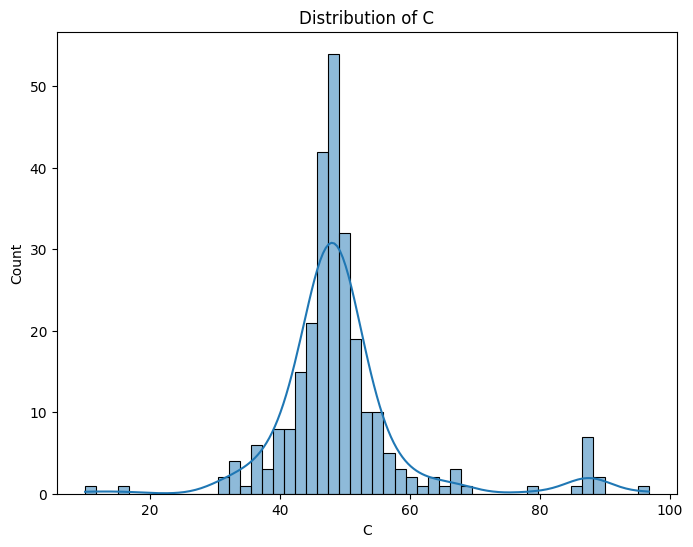

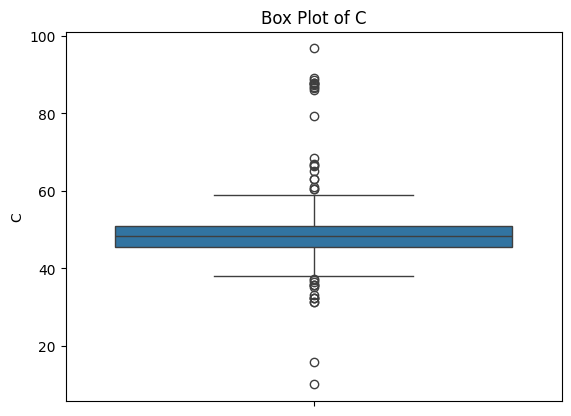

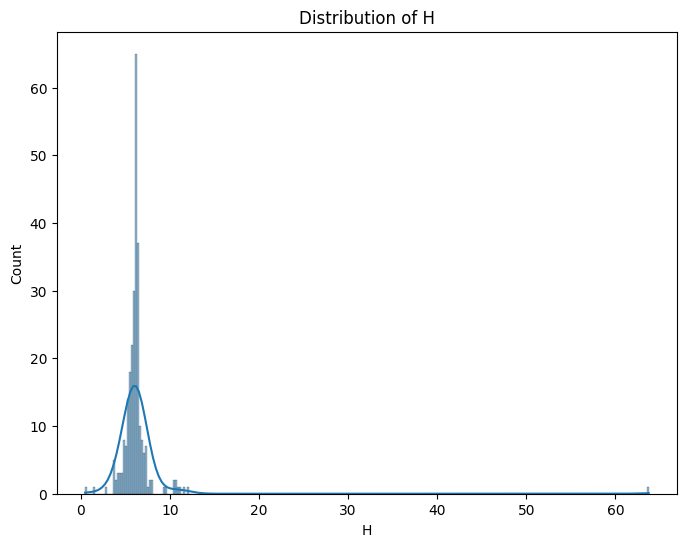

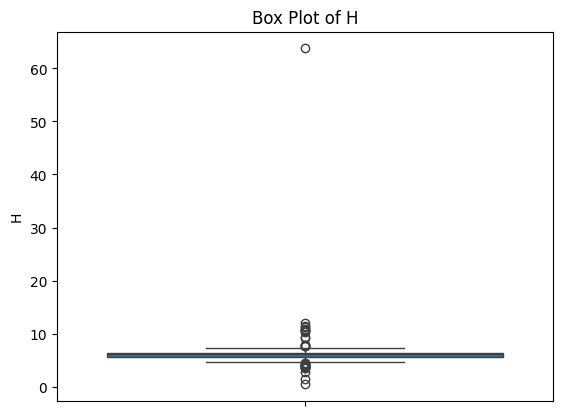

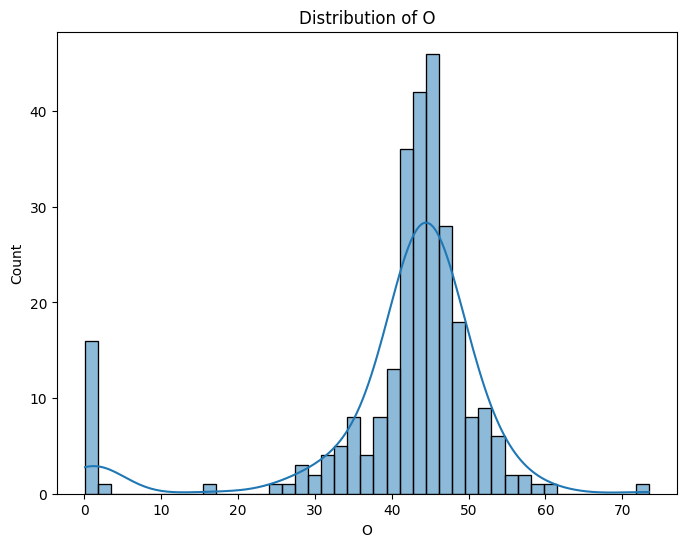

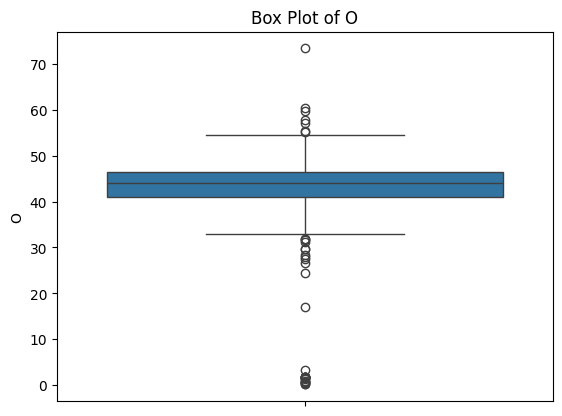

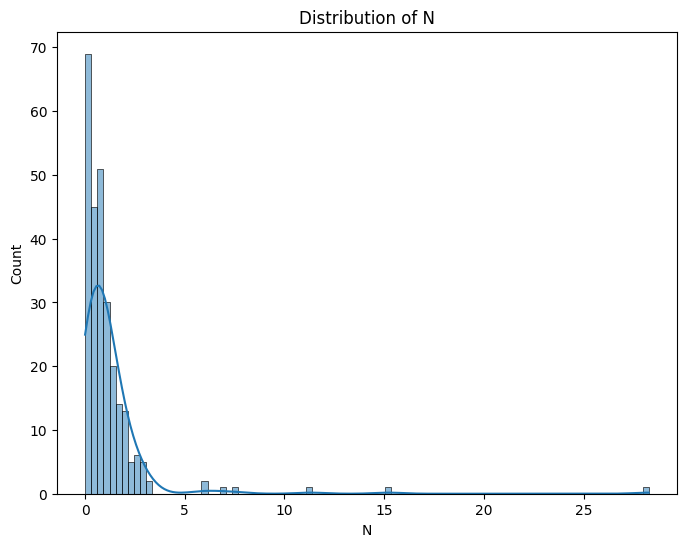

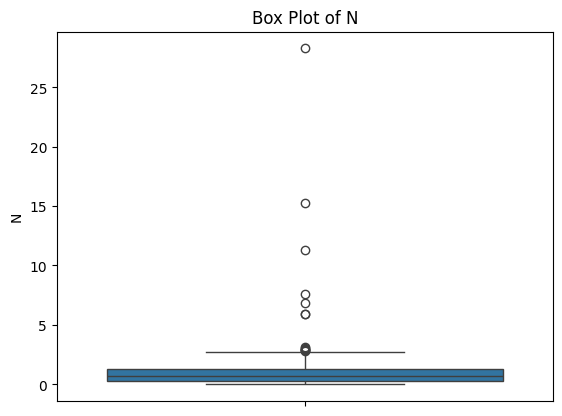

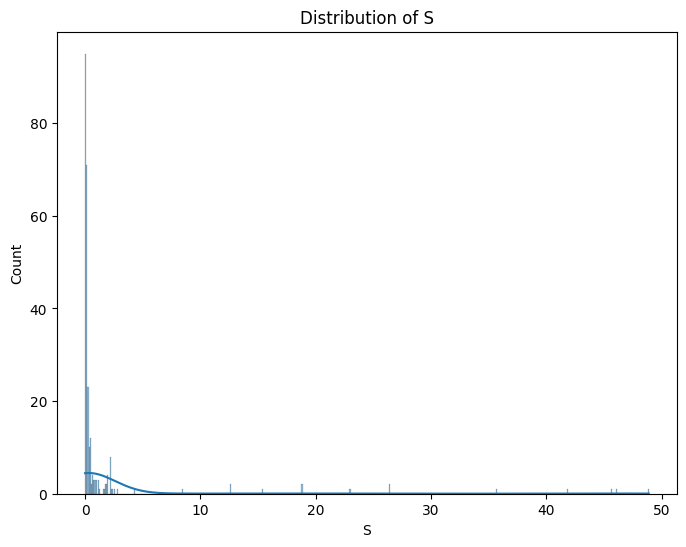

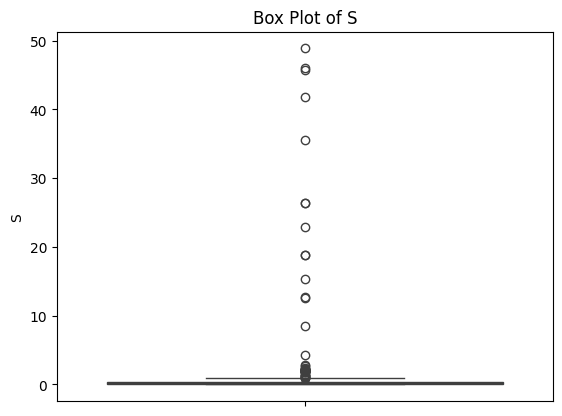

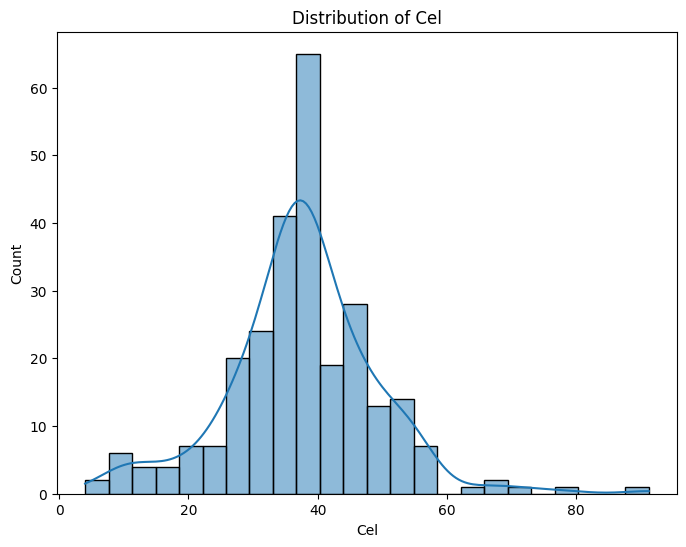

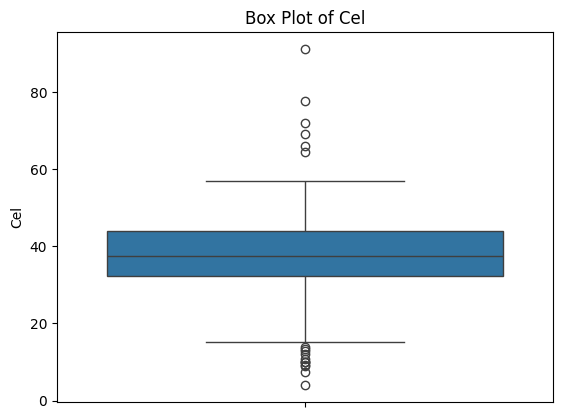

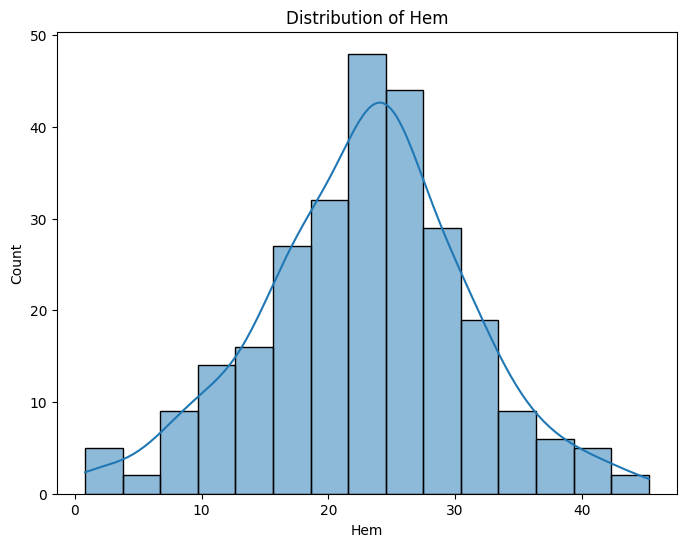

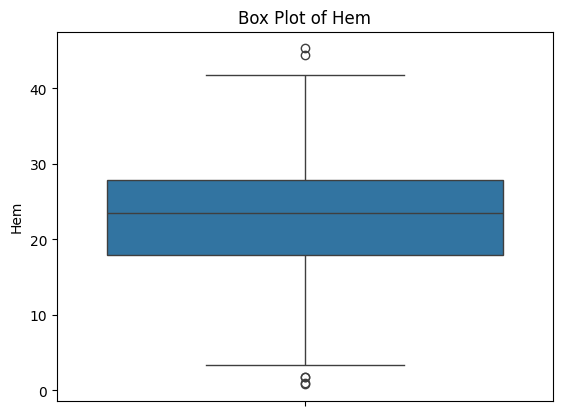

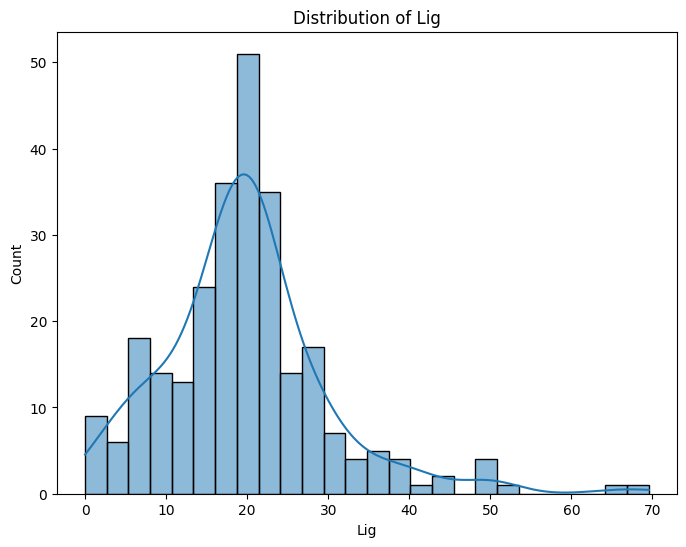

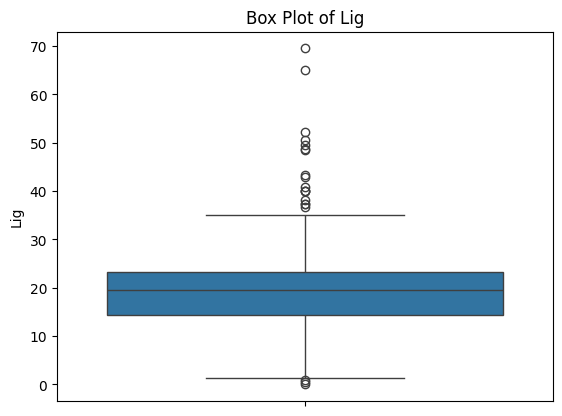

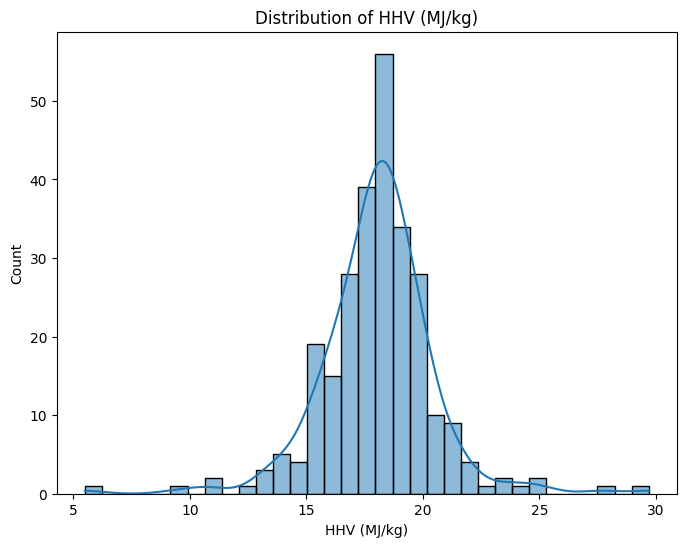

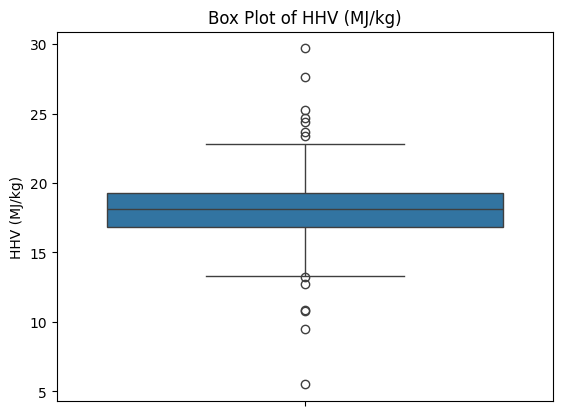

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_check:
  # Histogram
   plt.figure(figsize=(8, 6))
   sns.histplot(data[column], kde=True)
   plt.title(f'Distribution of {column}')
   plt.show()
   # Box Plot plt.figure(figsize=(8, 6))
   sns.boxplot(y=data[column])
   plt.title(f'Box Plot of {column}')
   plt.show()

In [29]:
data.isnull().sum()  # Check for missing values in each column

Unnamed: 0     2
Biomass        6
ASH            0
VM             0
FC             0
C              0
H              0
O              0
N              0
S              0
Cel            0
Hem            0
Lig            0
HHV (MJ/kg)    0
Source         8
dtype: int64

In [30]:
from scipy.stats import kurtosis
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
for column in columns_to_check:
  kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
  print(f"Kurtosis of {column}: {kurt}")
  if kurt > 3:
    print(f"{column} has heavy tails (kurtosis > 3)")

Kurtosis of ASH: 45.775559011907504
ASH has heavy tails (kurtosis > 3)
Kurtosis of VM: 11.043395164548981
VM has heavy tails (kurtosis > 3)
Kurtosis of FC: 13.299479289695146
FC has heavy tails (kurtosis > 3)
Kurtosis of C: 9.705196677131635
C has heavy tails (kurtosis > 3)
Kurtosis of H: 208.46983300240063
H has heavy tails (kurtosis > 3)
Kurtosis of O: 8.385621021045056
O has heavy tails (kurtosis > 3)
Kurtosis of N: 92.43456089099377
N has heavy tails (kurtosis > 3)
Kurtosis of S: 31.653760953771428
S has heavy tails (kurtosis > 3)
Kurtosis of Cel: 5.32199537755065
Cel has heavy tails (kurtosis > 3)
Kurtosis of Hem: 3.241629256924841
Hem has heavy tails (kurtosis > 3)
Kurtosis of Lig: 6.505382775272934
Lig has heavy tails (kurtosis > 3)
Kurtosis of HHV (MJ/kg): 8.57918740914216
HHV (MJ/kg) has heavy tails (kurtosis > 3)


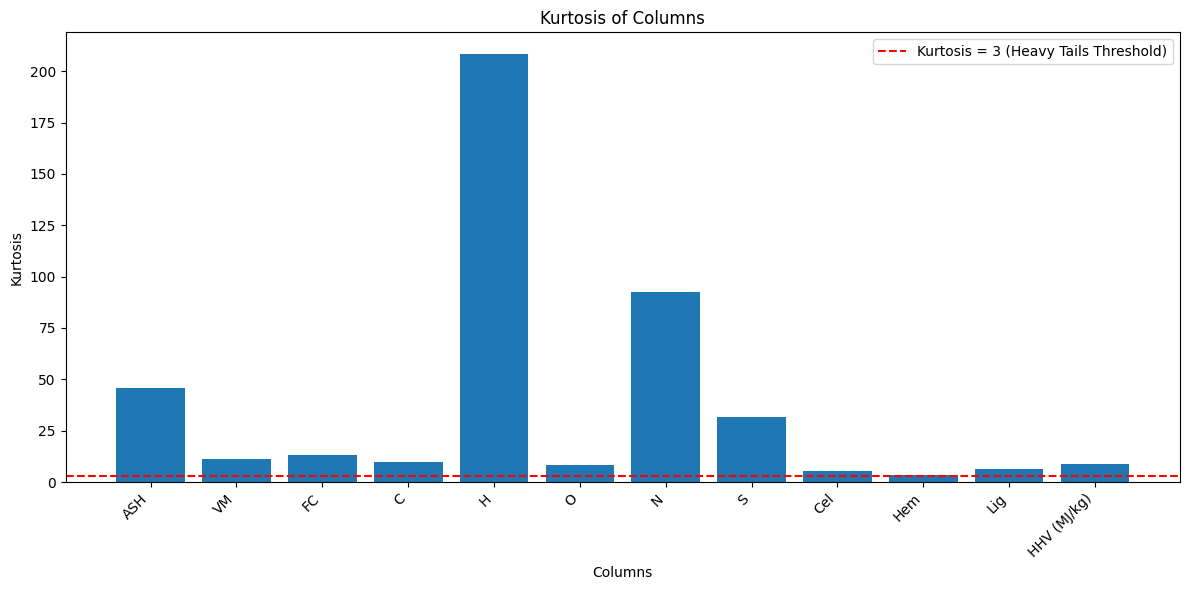

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis

columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
kurtosis_values = []

for column in columns_to_check:
    kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
    kurtosis_values.append(kurt)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(columns_to_check, kurtosis_values)
plt.title('Kurtosis of Columns')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.axhline(y=3, color='r', linestyle='--', label='Kurtosis = 3 (Heavy Tails Threshold)')  # Add a horizontal line at kurtosis = 3
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
#removing the heavy tail using Winsorization
from scipy.stats.mstats import winsorize

# Columns to apply Winsorization
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Apply Winsorization to each column
for column in columns_to_check:
    data[column] = winsorize(data[column], limits=[0.1, 0.1])  # Winsorize at 5% and 95% percentiles

In [ ]:
#Lets check kurtosis again


In [33]:
from scipy.stats import kurtosis

columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_check:
    kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
    print(f"Kurtosis of {column}: {kurt}")
    if kurt > 3:
        print(f"{column} still has heavy tails (kurtosis > 3)")
    else:
        print(f"{column} now has less or no heavy tails (kurtosis <=3)")

Kurtosis of ASH: 1.9966771708894195
ASH now has less or no heavy tails (kurtosis <=3)
Kurtosis of VM: 2.1557252456736076
VM now has less or no heavy tails (kurtosis <=3)
Kurtosis of FC: 2.440796263871829
FC now has less or no heavy tails (kurtosis <=3)
Kurtosis of C: 2.4293635431025464
C now has less or no heavy tails (kurtosis <=3)
Kurtosis of H: 2.401769929356204
H now has less or no heavy tails (kurtosis <=3)
Kurtosis of O: 2.825399224106282
O now has less or no heavy tails (kurtosis <=3)
Kurtosis of N: 2.2162498415427536
N now has less or no heavy tails (kurtosis <=3)
Kurtosis of S: 4.54721471475422
S still has heavy tails (kurtosis > 3)
Kurtosis of Cel: 2.1857264039458806
Cel now has less or no heavy tails (kurtosis <=3)
Kurtosis of Hem: 2.01778448852608
Hem now has less or no heavy tails (kurtosis <=3)
Kurtosis of Lig: 2.180440681365956
Lig now has less or no heavy tails (kurtosis <=3)
Kurtosis of HHV (MJ/kg): 1.9904549302820793
HHV (MJ/kg) now has less or no heavy tails (kurtosi

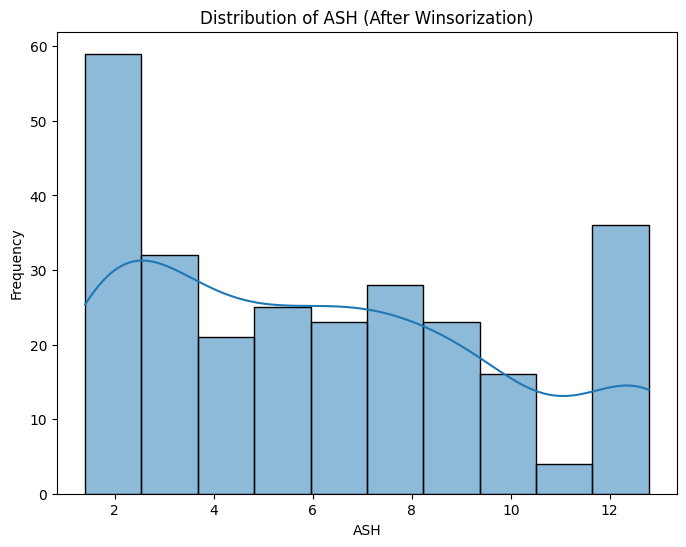

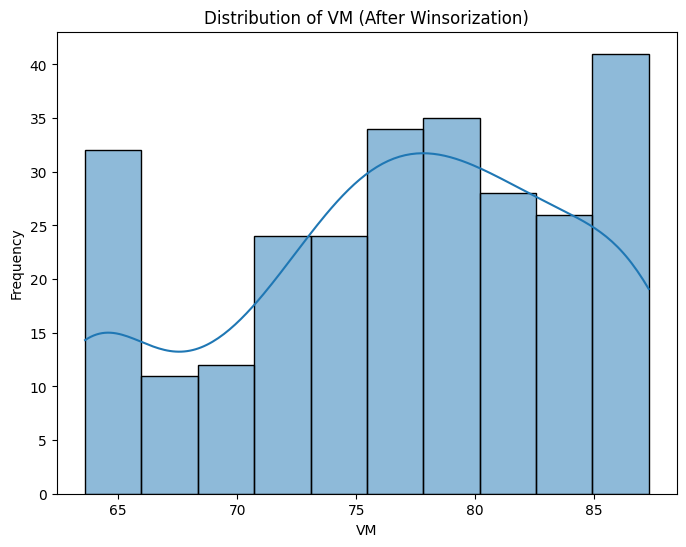

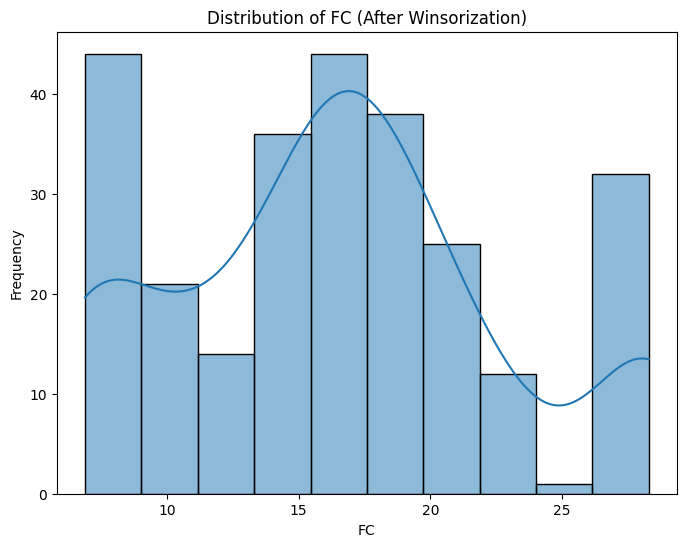

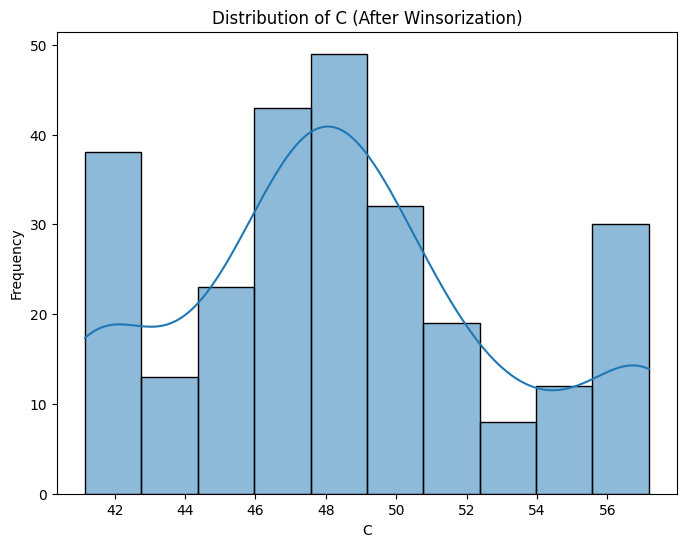

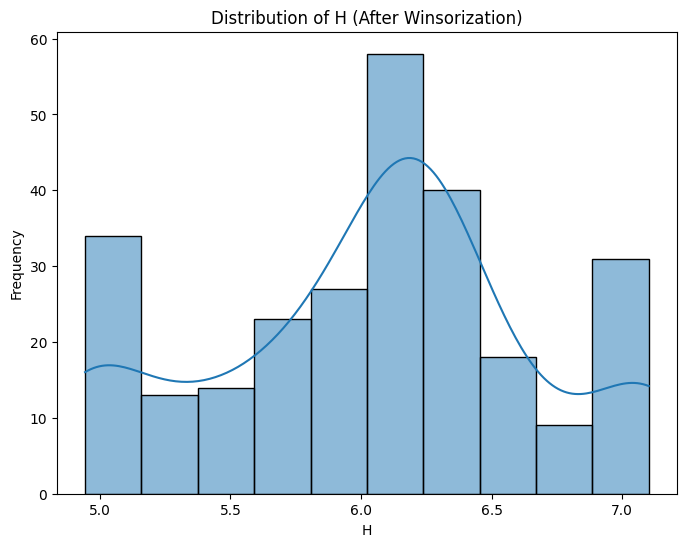

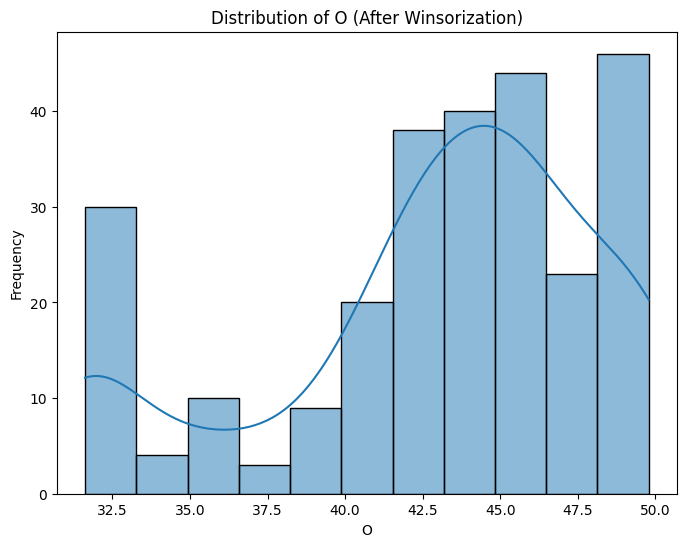

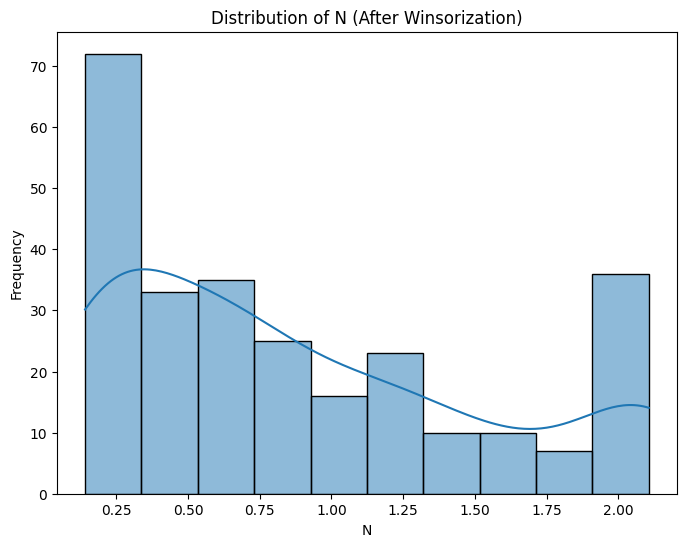

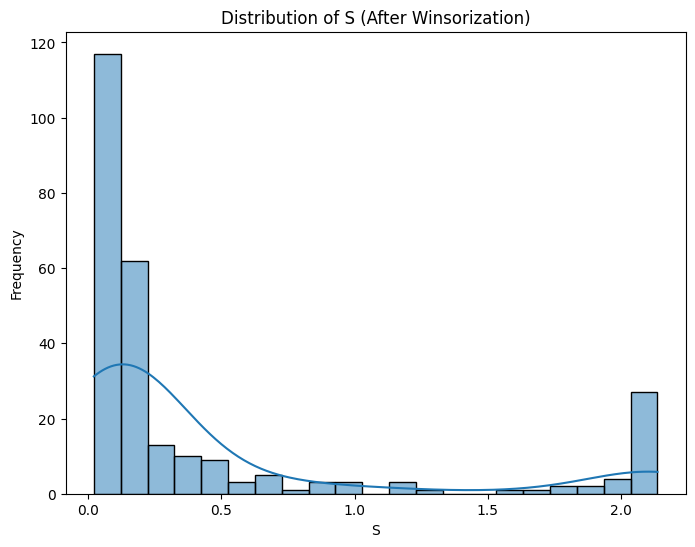

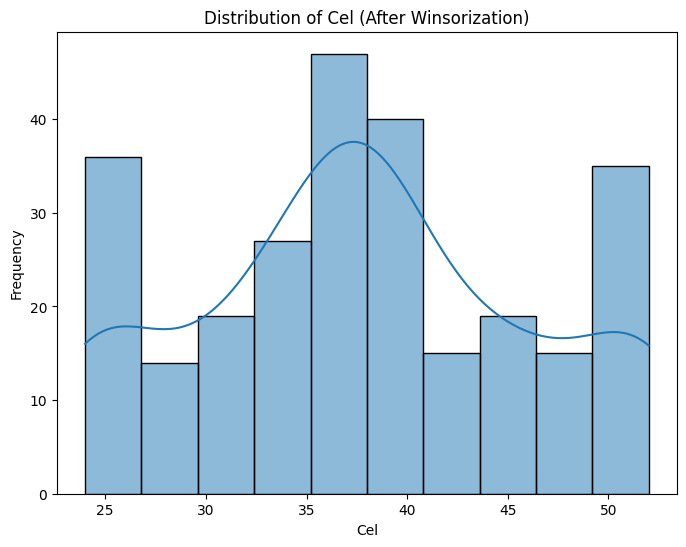

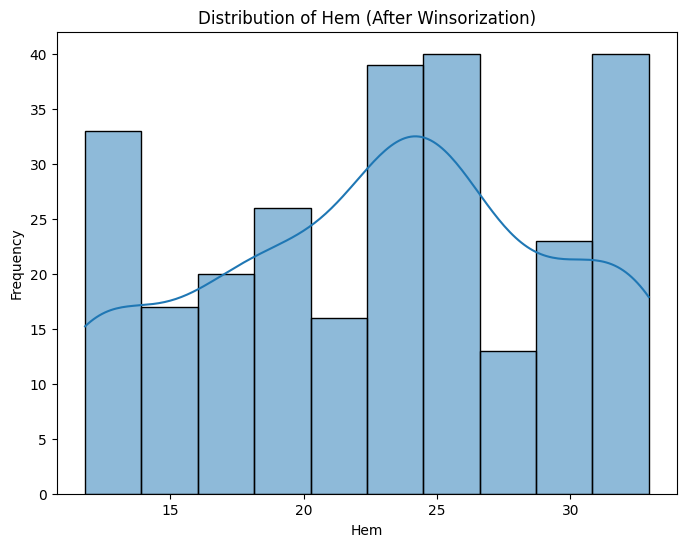

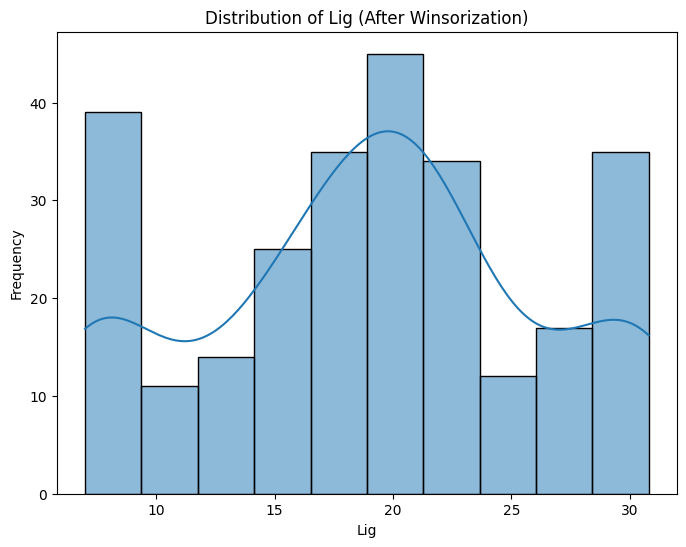

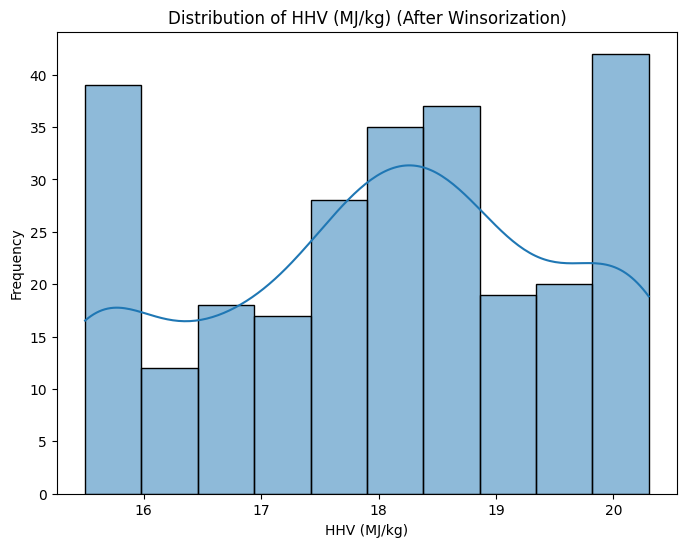

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(data[column], kde=True)  # kde=True adds a kernel density estimate curve
    plt.title(f'Distribution of {column} (After Winsorization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [35]:
#print mising values
data.isnull().sum()

Unnamed: 0     2
Biomass        6
ASH            0
VM             0
FC             0
C              0
H              0
O              0
N              0
S              0
Cel            0
Hem            0
Lig            0
HHV (MJ/kg)    0
Source         8
dtype: int64

In [36]:
#print descriptive stats to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
data.describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

ASH     VM     FC      C      H      O      N      S    Cel    Hem  \
count 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00   
mean    6.17  76.78  16.42  48.45   6.04  42.91   0.88   0.46  37.78  22.88   
std     3.68   7.24   6.28   4.65   0.62   5.40   0.65   0.68   8.36   6.54   
min     1.40  63.61   6.89  41.16   4.94  31.62   0.14   0.02  24.00  11.80   
25%     2.90  72.15  11.56  45.53   5.68  40.98   0.30   0.08  32.25  17.96   
50%     5.70  77.60  16.70  48.27   6.14  44.02   0.68   0.15  37.60  23.46   
75%     8.98  82.47  19.84  51.03   6.40  46.56   1.29   0.41  44.00  27.90   
max    12.79  87.29  28.30  57.17   7.10  49.78   2.11   2.14  52.00  32.95   

         Lig  HHV (MJ/kg)  
count 267.00       267.00  
mean   19.02        18.03  
std     7.18         1.52  
min     7.00        15.50  
25%    14.34        16.84  
50%    19.50        18.11  
75%    23.25        19.25  
max    30.80        20.30

In [19]:
data.head()


Unnamed: 0             Biomass   ASH    VM    FC     C    H     O    N    S  \
0   1.              Alfalfa Stem  5.27 78.92 15.81 50.05 6.37 40.52 2.11 0.21   
1   2.          alfalfa (lucern)  9.40 73.90 16.70 48.70 6.49 39.94 2.11 2.14   
2   3.        alfalfa seed straw  7.25 72.60 20.15 49.80 5.75 43.37 1.06 0.02   
3   4.          cotton gin trash 12.79 67.30 15.10 47.20 6.27 43.37 2.11 0.67   
4   5.          cotton gin waste  9.36 82.16  8.48 54.10 5.20 38.71 1.60 0.40   

    Cel   Hem   Lig  HHV (MJ/kg) Source  
0 35.80 18.48 23.36        18.67    [1]  
1 36.48 24.26 15.34        18.60    [2]  
2 41.65 19.39 29.16        18.45    [2]  
3 24.00 11.80 17.60        16.42    [2]  
4 52.00 16.00  7.00        16.27    [2]

In [ ]:
#trying watteserian GAN

In [20]:
#with plots
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import wasserstein_distance


# Set random seed for reproducibility
seed = 42
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)



if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# Force deterministic algorithms
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Mount Google Drive (if needed for saving/loading models)
drive.mount('/content/drive')

# Set device for GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load your dataframe (assuming it's already loaded as `data`)

# Extract numeric columns for GAN
numeric_features = [
    'ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S',
    'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'
]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

# Convert to PyTorch tensor and move to device
real_data = torch.tensor(data_scaled, dtype=torch.float32).to(device)

# Parameters
latent_dim = 12  # Latent dimension for noise
data_dim = real_data.shape[1]  # Number of features
batch_size = 64
epochs = 6000

# Define Generator
class Generator(nn.Module):
    def __init__(self, latent_dim, data_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.LeakyReLU(0.2),
            nn.Linear(256, data_dim),
            nn.ReLU(),  # We can delete this if needed
            nn.Tanh()  # Tanh activation for [-1, 1] outputs
        )

    def forward(self, z):
        return self.model(z)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, data_dim):  # Set the default data_dim to match your feature count
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(data_dim, 128),  # Map 12 -> 128
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),       # Map 128 -> 64
            nn.LeakyReLU(0.2),
            nn.LeakyReLU(0.2),#added
            nn.LeakyReLU(0.2),#added
            nn.LeakyReLU(0.2),#addded
            nn.LeakyReLU(0.2),#addded
            nn.LeakyReLU(0.2),#added

            nn.Linear(64, 1),         # Map 64 -> 1 (output score)
        )

    def forward(self, x):
        return self.model(x)

# Initialize models
generator = Generator(latent_dim, data_dim).to(device)
discriminator = Discriminator(data_dim).to(device)

# Optimizers and loss function
optimizer_G = optim.Adam(generator.parameters(), lr=0.0001, betas=(0.9, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.3, 0.999))

# Optional: Implement Learning Rate Scheduling
scheduler_G = optim.lr_scheduler.StepLR(optimizer_G, step_size=1000, gamma=0.5)
scheduler_D = optim.lr_scheduler.StepLR(optimizer_D, step_size=1000, gamma=0.5)

# Loss function: Mean Squared Error (MSE)
loss_function = nn.MSELoss()

# Store losses for plotting
d_losses = []
g_losses = []

# Training Loop
for epoch in range(epochs):
    for i in range(0, real_data.shape[0], batch_size):
        # Get real data batch
        real_batch = real_data[i:i + batch_size]
        current_batch_size = real_batch.shape[0]

        # Generate fake data
        noise = torch.randn(current_batch_size, latent_dim).to(device)
        fake_data = generator(noise)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(current_batch_size, 1).to(device)  # Real data label = 1
        fake_labels = torch.zeros(current_batch_size, 1).to(device)  # Fake data label = 0

        # Discriminator losses for real and fake data
        real_loss = loss_function(discriminator(real_batch), real_labels)
        fake_loss = loss_function(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        fake_labels = torch.ones(current_batch_size, 1).to(device)  # Generator wants fake data to be classified as real
        g_loss = loss_function(discriminator(fake_data), fake_labels)
        g_loss.backward()
        optimizer_G.step()

    # Log losses every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

    # Store the losses for plotting
    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

    # Optional: Apply learning rate scheduler
    scheduler_G.step()
    scheduler_D.step()

# Generate 1000 synthetic data points
noise = torch.randn(1000, latent_dim).to(device)
synthetic_data = generator(noise).detach().cpu().numpy()

# Inverse transform to original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=numeric_features)

# Optionally, save model to Google Drive
torch.save(generator.state_dict(), '/content/drive/MyDrive/generator_regression.pth')
torch.save(discriminator.state_dict(), '/content/drive/MyDrive/discriminator_regression.pth')

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Losses During Training')
plt.legend()
plt.show()

# Waterfall-like plot for GAN losses (step plot)
plt.figure(figsize=(10, 5))

# Create color map for the steps
colors = cm.viridis(np.linspace(0, 1, len(d_losses)))

# Plot discriminator loss as a step plot
plt.step(range(len(d_losses)), d_losses, where='mid', label="Discriminator Loss", color="r", linewidth=2)

# Plot generator loss as a step plot
plt.step(range(len(g_losses)), g_losses, where='mid', label="Generator Loss", color="b", linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Losses - Waterfall Style Plot')
plt.legend()
plt.show()

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Vanilla GAN Losses During Training')
plt.legend()
plt.show()

# Waterfall Plot
plt.figure(figsize=(10, 5))
plt.step(range(len(d_losses)), d_losses, where='mid', label='Discriminator Loss', color='r', linewidth=2)
plt.step(range(len(g_losses)), g_losses, where='mid', label='Generator Loss', color='b', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Losses - Waterfall Style')
plt.legend()
plt.show()

# Evaluate
real_df = pd.DataFrame(scaler.inverse_transform(real_data.cpu().numpy()), columns=numeric_features)

def compute_wasserstein_distances(real_df, synthetic_df, features):
    distances = {}
    for col in features:
        real = real_df[col].dropna()
        synth = synthetic_df[col].dropna()
        wd = wasserstein_distance(real, synth)
        distances[col] = wd
    return distances

def plot_kde_comparisons(real_df, synthetic_df, features, max_cols=3):
    num_features = len(features)
    ncols = max_cols
    nrows = int(np.ceil(num_features / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.kdeplot(real_df[col], ax=axes[i], label='Real', fill=True, color='green')
        sns.kdeplot(synthetic_df[col], ax=axes[i], label='Synthetic', fill=True, color='blue')
        axes[i].set_title(f"KDE: {col}")
        axes[i].legend()

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Run evaluation
distances = compute_wasserstein_distances(real_df, synthetic_df, numeric_features)
print("\nWasserstein Distances:")
for k, v in distances.items():
    print(f"{k}: {v:.6f}")

plot_kde_comparisons(real_df, synthetic_df, numeric_features)


Mounted at /content/drive
Using device: cpu


KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 0 | D Loss: 1.0556 | G Loss: 1.0427
Epoch 500 | D Loss: 0.0857 | G Loss: 0.6164
Epoch 1000 | D Loss: 0.0294 | G Loss: 1.0545
Epoch 1500 | D Loss: 0.0227 | G Loss: 1.1026
Epoch 2000 | D Loss: 0.0321 | G Loss: 1.1073
Epoch 2500 | D Loss: 0.0243 | G Loss: 1.3201
Epoch 3000 | D Loss: 0.0181 | G Loss: 1.1552
Epoch 3500 | D Loss: 0.0064 | G Loss: 1.0574
Epoch 4000 | D Loss: 0.0107 | G Loss: 1.0667
Epoch 4500 | D Loss: 0.0045 | G Loss: 1.0518
Epoch 5000 | D Loss: 0.0073 | G Loss: 1.0324
Epoch 5500 | D Loss: 0.0062 | G Loss: 0.9837


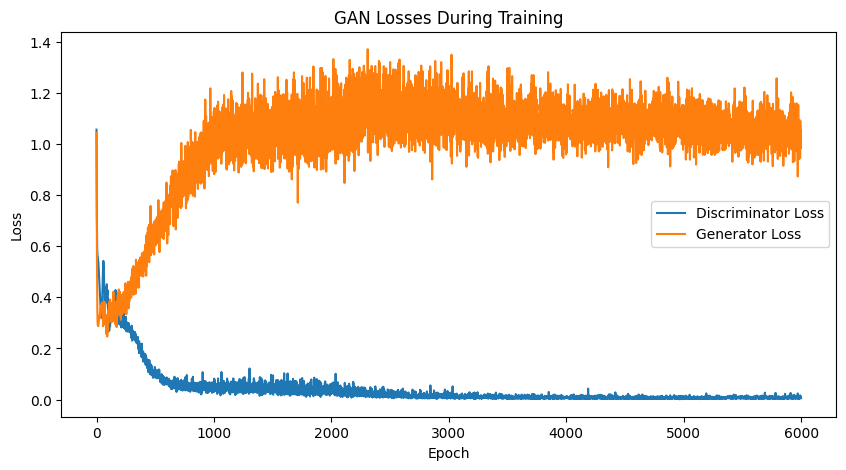

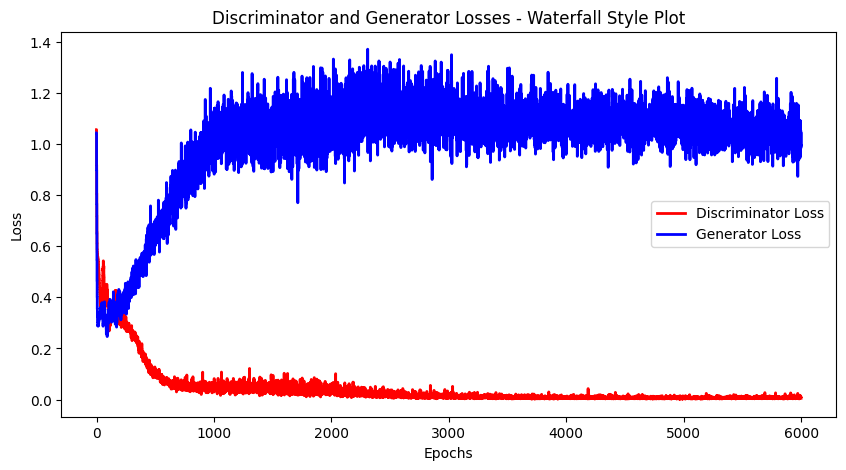

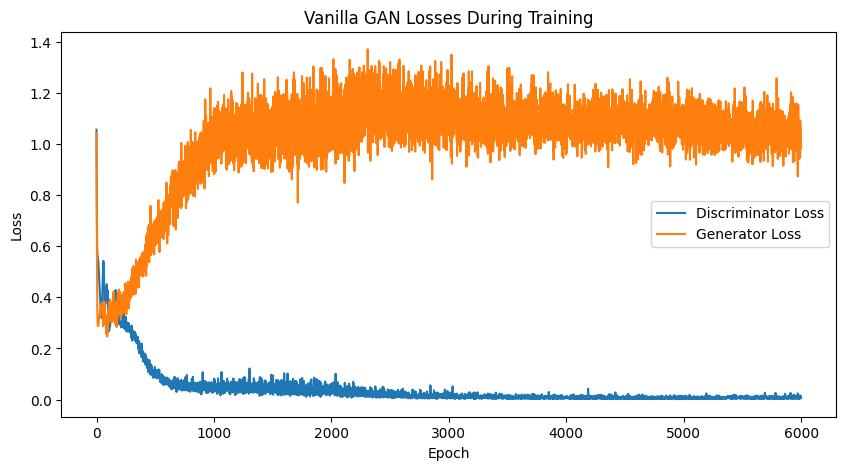

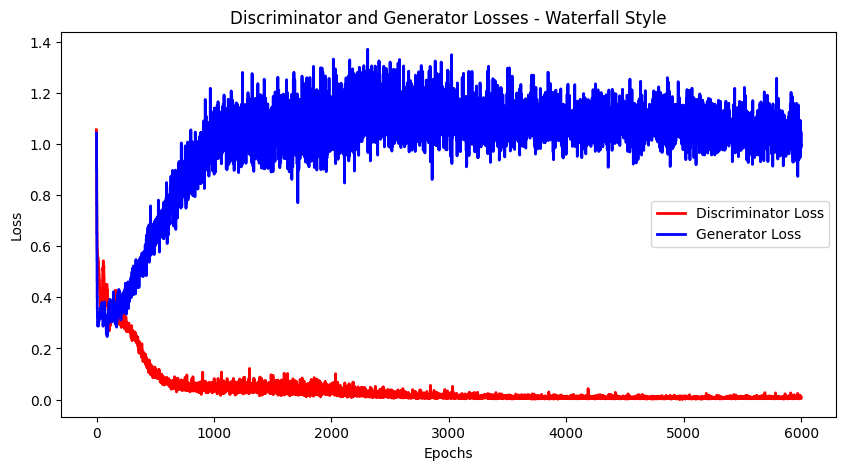


📏 Wasserstein Distances:
Lig           1.28
FC            1.26
Hem           1.16
Cel           1.13
C             0.76
ASH           0.70
VM            0.57
O             0.39
S             0.23
HHV (MJ/kg)   0.23
N             0.13
H             0.12
dtype: float64


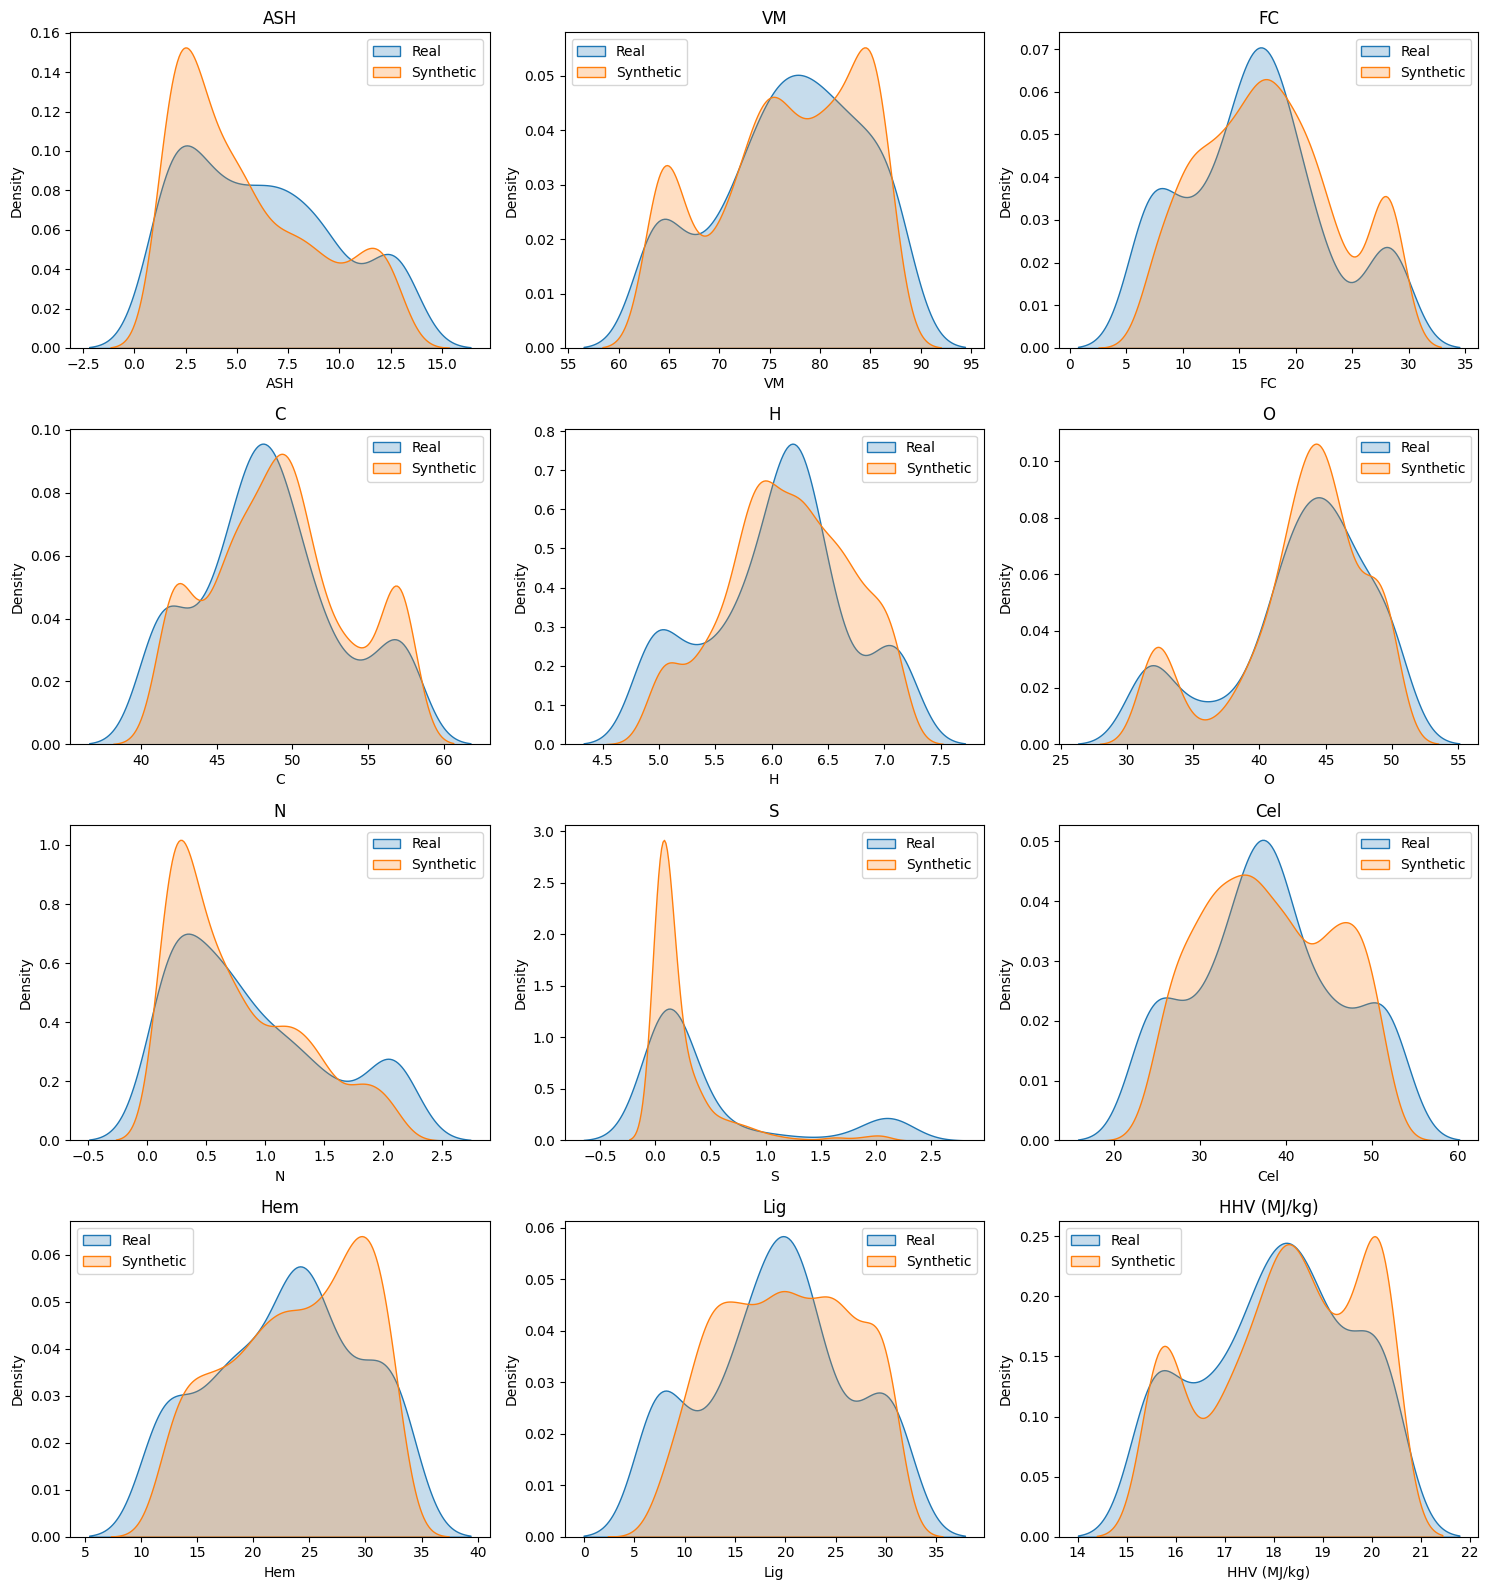

In [16]:
# 🧬 Conditional GAN (cGAN) for Biomass Data using VM, C, HHV as condition
#import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


# Seed and Device
seed = 42
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

drive.mount('/content/drive')

# === Load and scale your real data ===
numeric_features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
conditioning_features = ['VM', 'C', 'HHV (MJ/kg)']  # 👈 conditioning input

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_features])
data = pd.DataFrame(data_scaled, columns=numeric_features)

cond_scaled = data[conditioning_features].values
real_data = torch.tensor(data.values, dtype=torch.float32).to(device)
real_cond = torch.tensor(cond_scaled, dtype=torch.float32).to(device)

# === Hyperparameters ===
latent_dim = 12
cond_dim = real_cond.shape[1]
data_dim = real_data.shape[1]
batch_size = 64
epochs = 6000

# === cGAN Generator ===
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, cond_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim + cond_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            #nn.Tanh()
            nn.Sigmoid()

        )

    def forward(self, z, cond):
        return self.model(torch.cat([z, cond], dim=1))

# === cGAN Discriminator ===
class ConditionalDiscriminator(nn.Module):
    def __init__(self, input_dim, cond_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + cond_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 1)
        )

    def forward(self, x, cond):
        return self.model(torch.cat([x, cond], dim=1))

# === Model Init ===
generator = ConditionalGenerator(latent_dim, cond_dim, data_dim).to(device)
discriminator = ConditionalDiscriminator(data_dim, cond_dim).to(device)

# === Optimizers and Loss ===
optimizer_G = optim.Adam(generator.parameters(), lr=0.0001, betas=(0.9, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.3, 0.999))
loss_function = nn.MSELoss()

# === Training Loop ===
d_losses, g_losses = [], []

for epoch in range(epochs):
    for i in range(0, len(real_data), batch_size):
        real_batch = real_data[i:i + batch_size]
        cond_batch = real_cond[i:i + batch_size]
        b_size = real_batch.size(0)

        # === Train Discriminator ===
        optimizer_D.zero_grad()
        z = torch.randn(b_size, latent_dim).to(device)
        fake = generator(z, cond_batch)
        d_real = discriminator(real_batch, cond_batch)
        d_fake = discriminator(fake.detach(), cond_batch)
        d_loss = loss_function(d_real, torch.ones_like(d_real)) + \
                 loss_function(d_fake, torch.zeros_like(d_fake))
        d_loss.backward()
        optimizer_D.step()

        # === Train Generator ===
        optimizer_G.zero_grad()
        z = torch.randn(b_size, latent_dim).to(device)
        fake = generator(z, cond_batch)
        d_fake = discriminator(fake, cond_batch)
        g_loss = loss_function(d_fake, torch.ones_like(d_fake))
        g_loss.backward()
        optimizer_G.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

# === Generate synthetic data using real condition input (sampled properly) ===
z = torch.randn(1000, latent_dim).to(device)
idxs = torch.randint(0, real_cond.shape[0], (1000,))
cond_gen = real_cond[idxs]
synthetic = generator(z, cond_gen).detach().cpu().numpy()
synthetic = scaler.inverse_transform(synthetic)
synthetic_df = pd.DataFrame(synthetic, columns=numeric_features)


# Generate synthetic normalized data
synthetic = generator(z, cond_gen).detach().cpu().numpy()

# ✅ Clip to [0, 1] to eliminate numerical underflow/overflow
synthetic = np.clip(synthetic, 0, 1)

# === Inverse transform to real scale ===
synthetic = scaler.inverse_transform(synthetic)
synthetic_df = pd.DataFrame(synthetic, columns=numeric_features)

# === Also correct real data transformation ===
real_df = pd.DataFrame(scaler.inverse_transform(real_data.cpu().numpy()), columns=numeric_features)

#..............................................
#.............................................
# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Losses During Training')
plt.legend()
plt.show()

# Waterfall-like plot for GAN losses (step plot)
plt.figure(figsize=(10, 5))

# Create color map for the steps
colors = cm.viridis(np.linspace(0, 1, len(d_losses)))

# Plot discriminator loss as a step plot
plt.step(range(len(d_losses)), d_losses, where='mid', label="Discriminator Loss", color="r", linewidth=2)

# Plot generator loss as a step plot
plt.step(range(len(g_losses)), g_losses, where='mid', label="Generator Loss", color="b", linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Losses - Waterfall Style Plot')
plt.legend()
plt.show()

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Vanilla GAN Losses During Training')
plt.legend()
plt.show()

# Waterfall Plot
plt.figure(figsize=(10, 5))
plt.step(range(len(d_losses)), d_losses, where='mid', label='Discriminator Loss', color='r', linewidth=2)
plt.step(range(len(g_losses)), g_losses, where='mid', label='Generator Loss', color='b', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Losses - Waterfall Style')
plt.legend()
plt.show()

# After GAN generation
synthetic = generator(z, cond_gen).detach().cpu().numpy()

# BEFORE evaluation or filtering
synthetic = scaler.inverse_transform(synthetic)
synthetic_df = pd.DataFrame(synthetic, columns=numeric_features)


# === Evaluate Wasserstein ===
real_df = pd.DataFrame(scaler.inverse_transform(real_data.cpu().numpy()), columns=numeric_features)
wd = {col: wasserstein_distance(real_df[col], synthetic_df[col]) for col in numeric_features}
print("\n📏 Wasserstein Distances:")
print(pd.Series(wd).sort_values(ascending=False))

# === Plot KDEs ===
def plot_kde(real_df, synthetic_df, features):
    import seaborn as sns
    rows = int(np.ceil(len(features)/3))
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
    axes = axes.flatten()
    for i, col in enumerate(features):
        sns.kdeplot(real_df[col], ax=axes[i], label='Real', fill=True)
        sns.kdeplot(synthetic_df[col], ax=axes[i], label='Synthetic', fill=True)
        axes[i].set_title(col)
        axes[i].legend()
    plt.tight_layout()
    plt.show()

plot_kde(real_df, synthetic_df, numeric_features)


In [44]:
synthetic_df.head()

ASH   VM   FC    C    H    O    N    S  Cel  Hem  Lig  HHV (MJ/kg)
0 0.31 0.43 0.58 0.26 0.58 0.91 0.15 0.38 0.80 0.03 0.97         0.02
1 0.97 0.67 0.29 0.73 0.95 0.58 0.00 0.44 0.64 0.85 0.43         0.06
2 0.20 0.65 0.48 0.34 0.70 0.78 0.07 0.01 0.42 0.68 0.80         0.84
3 0.25 0.26 0.87 0.31 0.40 0.68 0.22 0.05 0.25 0.47 0.97         0.69
4 0.12 0.14 0.98 0.48 0.39 0.60 0.07 0.01 0.01 0.72 0.98         0.62

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 0 | D Loss: 1.3888 | DF Loss: 1.3849 | G Loss: 1.2663
Epoch 500 | D Loss: 1.2943 | DF Loss: 1.3051 | G Loss: 1.2887
Epoch 1000 | D Loss: 1.3169 | DF Loss: 1.3080 | G Loss: 1.2311
Epoch 1500 | D Loss: 1.2940 | DF Loss: 1.2722 | G Loss: 1.3599
Epoch 2000 | D Loss: 1.2861 | DF Loss: 1.2474 | G Loss: 1.5742
Epoch 2500 | D Loss: 1.2816 | DF Loss: 1.1746 | G Loss: 1.5797
Epoch 3000 | D Loss: 1.3053 | DF Loss: 1.2430 | G Loss: 1.7061
Epoch 3500 | D Loss: 1.2894 | DF Loss: 1.2289 | G Loss: 1.6610
Epoch 4000 | D Loss: 1.2315 | DF Loss: 1.2502 | G Loss: 1.8651
Epoch 4500 | D Loss: 1.2420 | DF Loss: 1.2079 | G Loss: 1.9724
Epoch 5000 | D Loss: 1.2741 | DF Loss: 1.2525 | G Loss: 2.0676
Epoch 5500 | D Loss: 1.2088 | DF Loss: 1.2610 | G Loss: 2.3540

📏 Wasserstein Distances:
Cel           0.70
Lig           0.45
Hem           0.42
VM            0.41
ASH           0.3

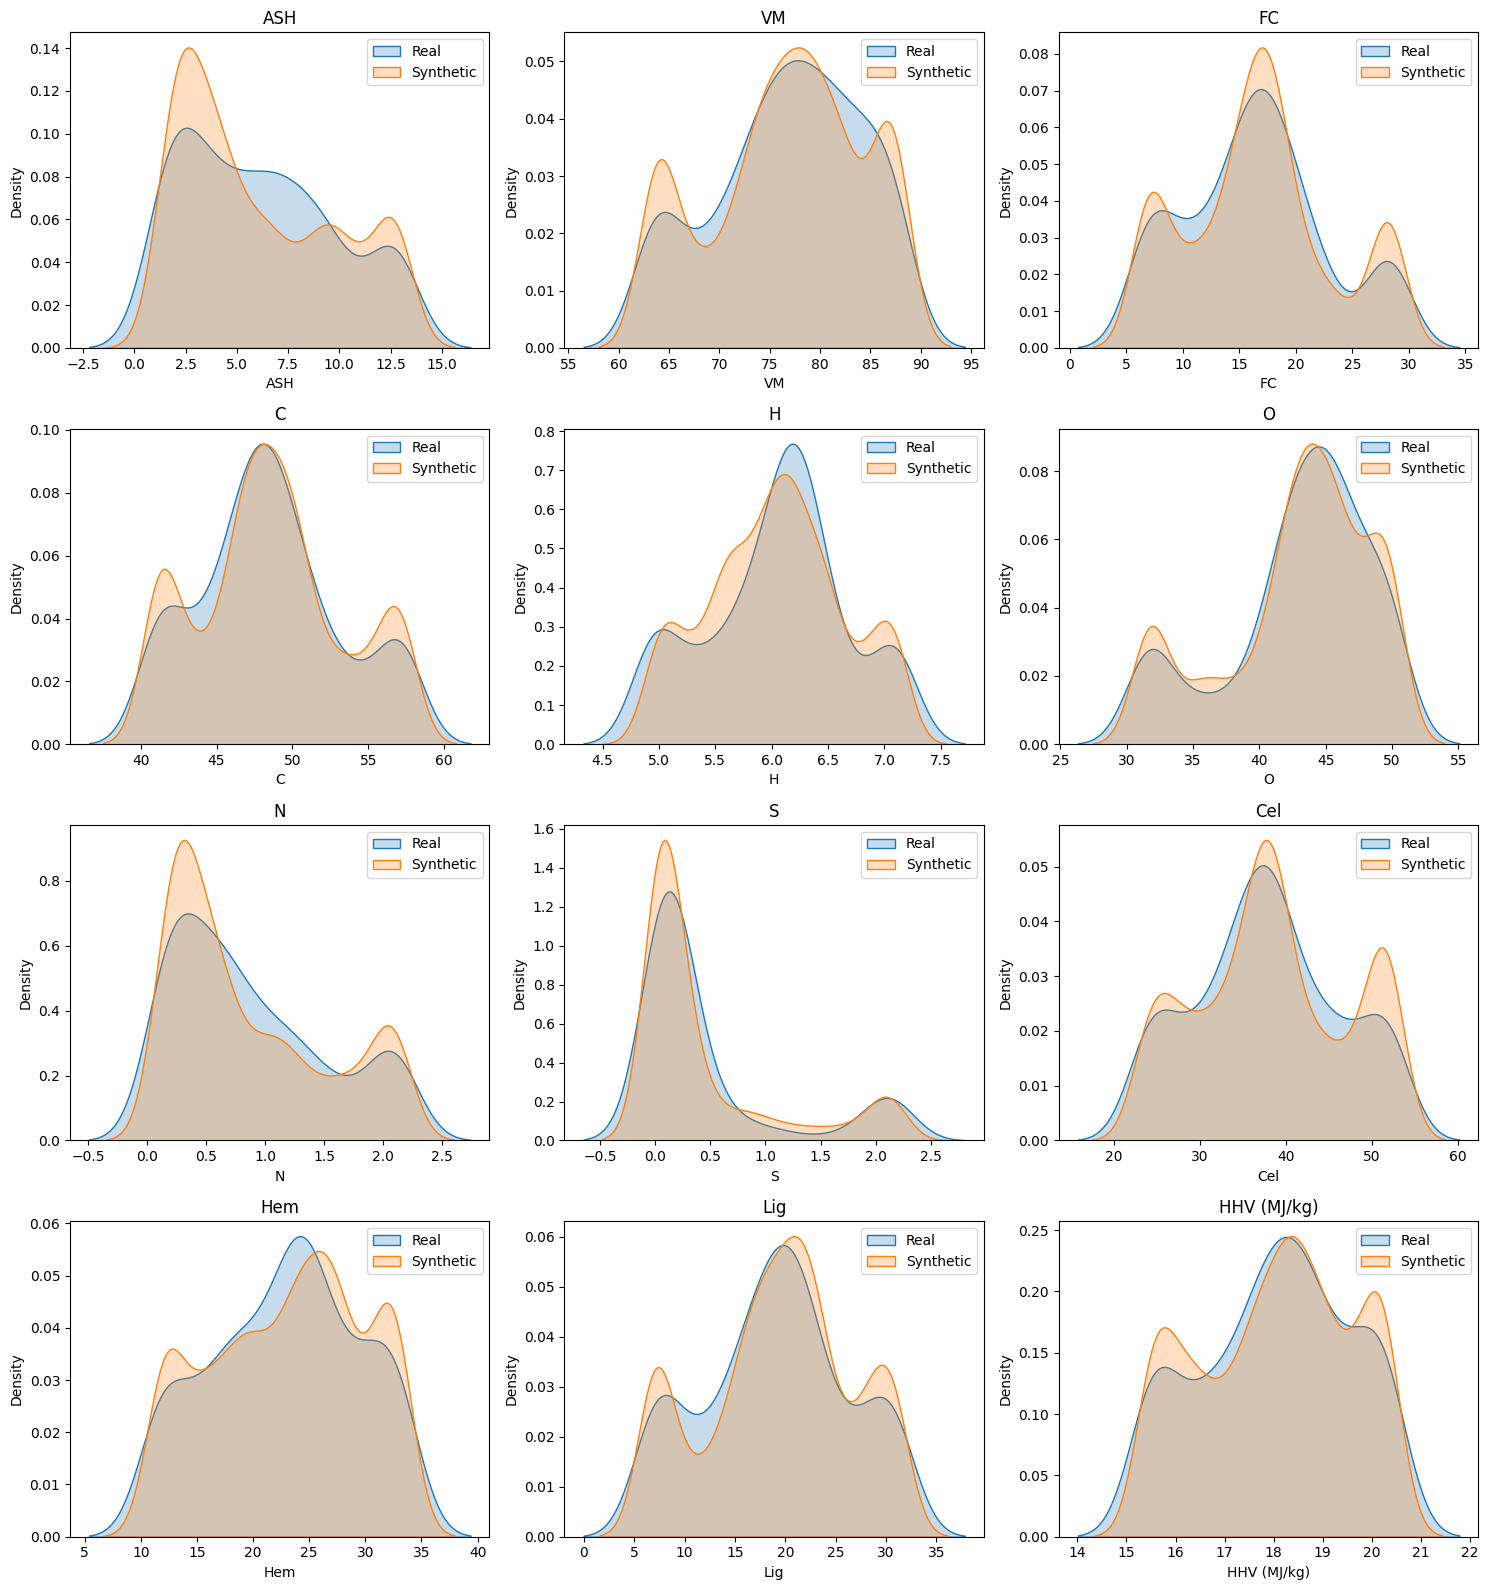

In [37]:
# 🧬 Conditional GAN (cGAN) for Biomass Data using VM, C, HHV, Cel, Lig as condition
#import torch
#import torch._dynamo
#torch._dynamo.config.suppress_errors = True
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# === Setup
seed = 42
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

drive.mount('/content/drive')

# === Feature definitions
numeric_features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
conditioning_features = ['VM', 'C', 'HHV (MJ/kg)', 'Cel', 'Lig', 'O', 'FC', 'Hem']

# === Normalization
scaler = MinMaxScaler()
cond_scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_features])
cond_scaled = cond_scaler.fit_transform(data[conditioning_features])

real_data = torch.tensor(data_scaled, dtype=torch.float32).to(device)
real_cond = torch.tensor(cond_scaled, dtype=torch.float32).to(device)

# === Hyperparameters
latent_dim = 12
cond_dim = real_cond.shape[1]
data_dim = real_data.shape[1]
batch_size = 64
epochs = 6000

# === Generator (FEATURE-AWARE CONDITIONING SPLIT)
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, cond_dim, output_dim):
        super().__init__()
        self.struct_idx = [conditioning_features.index(f) for f in ['Cel', 'Lig', 'Hem']]
        self.rest_idx = [i for i in range(cond_dim) if i not in self.struct_idx]

        self.struct_net = nn.Sequential(
            nn.Linear(len(self.struct_idx), 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU()
        )

        self.rest_net = nn.Sequential(
            nn.Linear(len(self.rest_idx), 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + 128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Sigmoid()
        )

    def forward(self, z, cond):
        struct = cond[:, self.struct_idx]
        rest = cond[:, self.rest_idx]
        s_feat = self.struct_net(struct)
        r_feat = self.rest_net(rest)
        combined = torch.cat([s_feat, r_feat], dim=1)
        return self.decoder(torch.cat([z, combined], dim=1))

# === Main Discriminator
class ConditionalDiscriminator(nn.Module):
    def __init__(self, input_dim, cond_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + cond_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x, cond):
        return self.model(torch.cat([x, cond], dim=1))

# === Focused Discriminator (for Cel, Lig, FC, Hem, O, VM)
class FocusedDiscriminator(nn.Module):
    def __init__(self, selected_idx, cond_dim):
        super().__init__()
        self.selected_idx = selected_idx
        self.model = nn.Sequential(
            nn.Linear(len(selected_idx) + cond_dim, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x, cond):
        x_focus = x[:, self.selected_idx]
        return self.model(torch.cat([x_focus, cond], dim=1))

# === Initialize models
generator = ConditionalGenerator(latent_dim, cond_dim, data_dim).to(device)
discriminator = ConditionalDiscriminator(data_dim, cond_dim).to(device)
focused_idx = [numeric_features.index(f) for f in ['Cel', 'Lig', 'FC', 'Hem', 'O', 'VM']]
discriminator_focus = FocusedDiscriminator(focused_idx, cond_dim).to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=0.0001, betas=(0.9, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.3, 0.999))
optimizer_DF = optim.Adam(discriminator_focus.parameters(), lr=0.0002, betas=(0.3, 0.999))
loss_function = nn.BCELoss()

d_losses, g_losses = [], []

# === Training loop
for epoch in range(epochs):
    for i in range(0, len(real_data), batch_size):
        real_batch = real_data[i:i + batch_size]
        cond_batch = real_cond[i:i + batch_size]
        b_size = real_batch.size(0)

        real_labels = torch.empty(b_size, 1).uniform_(0.9, 1.0).to(device)
        fake_labels = torch.empty(b_size, 1).uniform_(0.0, 0.1).to(device)

        # === Train Discriminators
        z = torch.randn(b_size, latent_dim).to(device)
        fake = generator(z, cond_batch).detach()

        # Full Discriminator
        optimizer_D.zero_grad()
        d_real = discriminator(real_batch, cond_batch)
        d_fake = discriminator(fake, cond_batch)
        d_loss = loss_function(d_real, real_labels) + loss_function(d_fake, fake_labels)
        d_loss.backward()
        optimizer_D.step()

        # Focused Discriminator
        optimizer_DF.zero_grad()
        df_real = discriminator_focus(real_batch, cond_batch)
        df_fake = discriminator_focus(fake, cond_batch)
        df_loss = loss_function(df_real, real_labels) + loss_function(df_fake, fake_labels)
        df_loss.backward()
        optimizer_DF.step()

        # === Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(b_size, latent_dim).to(device)
        fake = generator(z, cond_batch)

        d_fake = discriminator(fake, cond_batch)
        df_fake = discriminator_focus(fake, cond_batch)

        g_loss = loss_function(d_fake, real_labels) + 0.7 * loss_function(df_fake, real_labels)

        # === Wasserstein regularization
        gen_np = fake.cpu().detach().numpy()
        real_np = real_batch.cpu().detach().numpy()
        cel_idx = numeric_features.index('Cel')
        lig_idx = numeric_features.index('Lig')
        wasserstein_reg = (
            wasserstein_distance(gen_np[:, cel_idx], real_np[:, cel_idx]) +
            wasserstein_distance(gen_np[:, lig_idx], real_np[:, lig_idx])
        )
        wasserstein_reg = torch.tensor(wasserstein_reg, dtype=torch.float32).to(device)
        g_loss += 0.2 * wasserstein_reg

        g_loss.backward()
        optimizer_G.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss.item():.4f} | DF Loss: {df_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

# === Generate Synthetic Data
z = torch.randn(1000, latent_dim).to(device)
idxs = torch.randint(0, real_cond.shape[0], (1000,))
cond_gen = real_cond[idxs]

synthetic = generator(z, cond_gen).detach().cpu().numpy()
synthetic = np.clip(synthetic, 0, 1)
synthetic = scaler.inverse_transform(synthetic)
synthetic_df = pd.DataFrame(synthetic, columns=numeric_features)
real_df = pd.DataFrame(scaler.inverse_transform(real_data.cpu().numpy()), columns=numeric_features)

# === Wasserstein Distance
wd = {col: wasserstein_distance(real_df[col], synthetic_df[col]) for col in numeric_features}
print("\n📏 Wasserstein Distances:")
print(pd.Series(wd).sort_values(ascending=False))

# === KDE Plot
def plot_kde(real_df, synthetic_df, features):
    rows = int(np.ceil(len(features)/3))
    fig, axes = plt.subplots(rows, 3, figsize=(15, 4*rows))
    axes = axes.flatten()
    for i, col in enumerate(features):
        sns.kdeplot(real_df[col], ax=axes[i], label='Real', fill=True)
        sns.kdeplot(synthetic_df[col], ax=axes[i], label='Synthetic', fill=True)
        axes[i].set_title(col)
        axes[i].legend()
    plt.tight_layout()
    plt.show()

plot_kde(real_df, synthetic_df, numeric_features)


In [38]:
from sklearn.model_selection import KFold

class FocusedDiscriminator(nn.Module):
    def __init__(self, selected_idx, cond_dim):
        super().__init__()
        self.selected_idx = selected_idx
        self.model = nn.Sequential(
            nn.Linear(len(selected_idx) + cond_dim, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x, cond):
        x_focus = x[:, self.selected_idx]
        return self.model(torch.cat([x_focus, cond], dim=1))

def compute_wd_cv(real_np, cond_np, GeneratorClass, DiscriminatorClass, latent_dim, cond_dim, data_dim, device, scaler, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    results = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(real_np)):
        print(f"\n🔁 Fold {fold + 1}")

        X_train, X_val = real_np[train_idx], real_np[val_idx]
        C_train, C_val = cond_np[train_idx], cond_np[val_idx]

        G = GeneratorClass(latent_dim, cond_dim, data_dim).to(device)
        D = DiscriminatorClass(data_dim, cond_dim).to(device)
        focus_idx = [numeric_features.index(f) for f in ['Cel', 'Lig', 'FC', 'Hem', 'O', 'VM']]
        DF = FocusedDiscriminator(focus_idx, cond_dim).to(device)

        opt_G = optim.Adam(G.parameters(), lr=0.0001, betas=(0.9, 0.999))
        opt_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.3, 0.999))
        opt_DF = optim.Adam(DF.parameters(), lr=0.0002, betas=(0.3, 0.999))
        loss_fn = nn.BCELoss()

        X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
        C_train = torch.tensor(C_train, dtype=torch.float32).to(device)

        for epoch in range(1000):
            for i in range(0, len(X_train), 64):
                xb = X_train[i:i + 64]
                cb = C_train[i:i + 64]
                bs = xb.shape[0]

                real_labels = torch.ones(bs, 1).to(device)
                fake_labels = torch.zeros(bs, 1).to(device)

                z = torch.randn(bs, latent_dim).to(device)
                fake = G(z, cb)

                # === Train Discriminators
                opt_D.zero_grad()
                d_real = D(xb, cb)
                d_fake = D(fake.detach(), cb)
                d_loss = loss_fn(d_real, real_labels) + loss_fn(d_fake, fake_labels)
                d_loss.backward()
                opt_D.step()

                opt_DF.zero_grad()
                df_real = DF(xb, cb)
                df_fake = DF(fake.detach(), cb)
                df_loss = loss_fn(df_real, real_labels) + loss_fn(df_fake, fake_labels)
                df_loss.backward()
                opt_DF.step()

                # === Train Generator
                opt_G.zero_grad()
                z = torch.randn(bs, latent_dim).to(device)
                fake = G(z, cb)
                d_fake = D(fake, cb)
                df_fake = DF(fake, cb)
                g_loss = loss_fn(d_fake, real_labels) + 0.7 * loss_fn(df_fake, real_labels)

                # === Wasserstein regularization
                gen_np = fake.detach().cpu().numpy()
                real_np_batch = xb.detach().cpu().numpy()

                cel_idx = numeric_features.index('Cel')
                lig_idx = numeric_features.index('Lig')
                o_idx   = numeric_features.index('O')
                fc_idx  = numeric_features.index('FC')
                hem_idx = numeric_features.index('Hem')

                wasserstein_reg = (
                    2.0 * wasserstein_distance(gen_np[:, cel_idx], real_np_batch[:, cel_idx]) +
                    1.8 * wasserstein_distance(gen_np[:, fc_idx], real_np_batch[:, fc_idx]) +
                    1.5 * wasserstein_distance(gen_np[:, hem_idx], real_np_batch[:, hem_idx]) +
                    1.2 * wasserstein_distance(gen_np[:, lig_idx], real_np_batch[:, lig_idx]) +
                    1.0 * wasserstein_distance(gen_np[:, o_idx],   real_np_batch[:, o_idx])
                )
                g_loss += 0.35 * torch.tensor(wasserstein_reg, dtype=torch.float32).to(device)
                g_loss.backward()
                opt_G.step()

        # === Generate Validation Set
        z_val = torch.randn(len(X_val), latent_dim).to(device)
        C_val_tensor = torch.tensor(C_val, dtype=torch.float32).to(device)
        fake_val = G(z_val, C_val_tensor).detach().cpu().numpy()

        fake_val_df = pd.DataFrame(scaler.inverse_transform(np.clip(fake_val, 0, 1)), columns=numeric_features)
        real_val_df = pd.DataFrame(scaler.inverse_transform(X_val), columns=numeric_features)

        # === Filter to feature ranges
        for col in numeric_features:
            min_val, max_val = real_val_df[col].min(), real_val_df[col].max()
            fake_val_df = fake_val_df[(fake_val_df[col] >= min_val) & (fake_val_df[col] <= max_val)]
        print(f"🧹 Filtered synthetic samples: {len(fake_val_df)} / {len(X_val)} retained.")

        wd_fold = [wasserstein_distance(real_val_df[c], fake_val_df[c]) for c in numeric_features]
        results.append(wd_fold)

    wd_df = pd.DataFrame(results, columns=numeric_features, index=[f"Fold_{i+1}" for i in range(folds)])
    print("\n📊 Cross-Validation Wasserstein Distance Summary:")
    print(wd_df.round(2))
    print("\nAverage per feature:")
    print(wd_df.mean().round(2))
compute_wd_cv(
    real_data.cpu().numpy(),
    real_cond.cpu().numpy(),
    ConditionalGenerator,
    ConditionalDiscriminator,
    latent_dim,
    cond_dim,
    data_dim,
    device,
    scaler
)



🔁 Fold 1
🧹 Filtered synthetic samples: 54 / 54 retained.

🔁 Fold 2
🧹 Filtered synthetic samples: 54 / 54 retained.

🔁 Fold 3
🧹 Filtered synthetic samples: 53 / 53 retained.

🔁 Fold 4
🧹 Filtered synthetic samples: 53 / 53 retained.

🔁 Fold 5
🧹 Filtered synthetic samples: 53 / 53 retained.

📊 Cross-Validation Wasserstein Distance Summary:
        ASH   VM   FC    C    H    O    N    S  Cel  Hem  Lig  HHV (MJ/kg)
Fold_1 0.92 1.21 0.60 0.72 0.11 0.91 0.13 0.12 1.35 0.65 0.74         0.27
Fold_2 0.47 0.81 0.61 0.56 0.15 0.84 0.08 0.07 0.66 0.70 0.76         0.16
Fold_3 1.05 0.60 1.63 1.22 0.17 0.85 0.12 0.09 2.41 0.96 0.75         0.20
Fold_4 0.86 1.58 0.51 1.06 0.15 0.81 0.06 0.22 1.47 0.73 0.94         0.19
Fold_5 0.39 2.04 1.20 0.65 0.11 0.75 0.04 0.14 0.98 1.25 2.01         0.27

Average per feature:
ASH           0.74
VM            1.25
FC            0.91
C             0.84
H             0.14
O             0.83
N             0.09
S             0.13
Cel           1.37
Hem           0.8

In [38]:
from sklearn.model_selection import KFold

def compute_wd_cv(real_np, cond_np, GeneratorClass, DiscriminatorClass, latent_dim, cond_dim, data_dim, device, scaler, folds=5):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    results = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(real_np)):
        print(f"\n🔁 Fold {fold + 1}")

        X_train, X_val = real_np[train_idx], real_np[val_idx]
        C_train, C_val = cond_np[train_idx], cond_np[val_idx]

        G = GeneratorClass(latent_dim, cond_dim, data_dim).to(device)
        D = DiscriminatorClass(data_dim, cond_dim).to(device)

        opt_G = optim.Adam(G.parameters(), lr=0.0001, betas=(0.9, 0.999))
        opt_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.3, 0.999))
        loss_fn = nn.BCELoss()

        X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
        C_train = torch.tensor(C_train, dtype=torch.float32).to(device)

        batch_size = 64
        epochs = 1000

        for epoch in range(epochs):
            for i in range(0, len(X_train), batch_size):
                xb = X_train[i:i + batch_size]
                cb = C_train[i:i + batch_size]
                bs = xb.shape[0]

                real_labels = torch.ones(bs, 1).to(device)
                fake_labels = torch.zeros(bs, 1).to(device)

                z = torch.randn(bs, latent_dim).to(device)
                fake = G(z, cb)

                # === Discriminator
                opt_D.zero_grad()
                d_real = D(xb, cb)
                d_fake = D(fake.detach(), cb)
                d_loss = loss_fn(d_real, real_labels) + loss_fn(d_fake, fake_labels)
                d_loss.backward()
                opt_D.step()

                # === Generator
                opt_G.zero_grad()
                z = torch.randn(bs, latent_dim).to(device)
                fake = G(z, cb)
                d_fake = D(fake, cb)
                g_loss = loss_fn(d_fake, real_labels)

                gen_np = fake.detach().cpu().numpy()
                real_np_batch = xb.detach().cpu().numpy()

                cel_idx = numeric_features.index('Cel')
                lig_idx = numeric_features.index('Lig')
                o_idx = numeric_features.index('O')
                fc_idx = numeric_features.index('FC')
                hem_idx = numeric_features.index('Hem')

                cel_wd = wasserstein_distance(gen_np[:, cel_idx], real_np_batch[:, cel_idx])
                lig_wd = wasserstein_distance(gen_np[:, lig_idx], real_np_batch[:, lig_idx])
                o_wd   = wasserstein_distance(gen_np[:, o_idx],   real_np_batch[:, o_idx])
                fc_wd  = wasserstein_distance(gen_np[:, fc_idx],  real_np_batch[:, fc_idx])
                hem_wd = wasserstein_distance(gen_np[:, hem_idx], real_np_batch[:, hem_idx])

                wasserstein_reg = (
                    2.0 * cel_wd +
                    1.8 * fc_wd +
                    1.5 * hem_wd +
                    1.2 * lig_wd +
                    1.0 * o_wd
                )
                g_loss += 0.35 * torch.tensor(wasserstein_reg, dtype=torch.float32).to(device)

                fc_l1 = torch.mean(torch.abs(fake[:, fc_idx] - xb[:, fc_idx]))
                hem_l1 = torch.mean(torch.abs(fake[:, hem_idx] - xb[:, hem_idx]))
                cel_l1 = torch.mean(torch.abs(fake[:, cel_idx] - xb[:, cel_idx]))
                o_l1   = torch.mean(torch.abs(fake[:, o_idx] - xb[:, o_idx]))
                g_loss += 0.15 * (fc_l1 + hem_l1 + cel_l1 + o_l1)

                g_loss.backward()
                opt_G.step()

        # === Generate Validation Set
        z_val = torch.randn(len(X_val), latent_dim).to(device)
        C_val_tensor = torch.tensor(C_val, dtype=torch.float32).to(device)
        fake_val = G(z_val, C_val_tensor).detach().cpu().numpy()

        fake_val_df = pd.DataFrame(scaler.inverse_transform(np.clip(fake_val, 0, 1)), columns=numeric_features)
        real_val_df = pd.DataFrame(scaler.inverse_transform(X_val), columns=numeric_features)

        # === Filter synthetic samples to real feature range
        feature_bounds = {col: (real_val_df[col].min(), real_val_df[col].max()) for col in numeric_features}
        for col in numeric_features:
            min_val, max_val = feature_bounds[col]
            fake_val_df = fake_val_df[(fake_val_df[col] >= min_val) & (fake_val_df[col] <= max_val)]
        print(f"🧹 Filtered synthetic samples: {len(fake_val_df)} / {len(X_val)} retained.")

        wd_fold = [wasserstein_distance(real_val_df[c], fake_val_df[c]) for c in numeric_features]
        results.append(wd_fold)

    # === Final WD Table
    wd_df = pd.DataFrame(results, columns=numeric_features, index=[f"Fold_{i+1}" for i in range(folds)])
    print("\n📊 Cross-Validation Wasserstein Distance Summary:")
    print(wd_df.round(2))
    print("\nAverage per feature:")
    print(wd_df.mean().round(2))

# === Run Cross-Validation
real_np = real_data.cpu().numpy()
cond_np = real_cond.cpu().numpy()

compute_wd_cv(real_np, cond_np, ConditionalGenerator, ConditionalDiscriminator,
              latent_dim, cond_dim, data_dim, device, scaler)



🔁 Fold 1
🧹 Filtered synthetic samples: 54 / 54 retained.

🔁 Fold 2
🧹 Filtered synthetic samples: 54 / 54 retained.

🔁 Fold 3
🧹 Filtered synthetic samples: 53 / 53 retained.

🔁 Fold 4
🧹 Filtered synthetic samples: 53 / 53 retained.

🔁 Fold 5
🧹 Filtered synthetic samples: 53 / 53 retained.

📊 Cross-Validation Wasserstein Distance Summary:
        ASH   VM   FC    C    H    O    N    S  Cel  Hem  Lig  HHV (MJ/kg)
Fold_1 0.95 1.44 0.69 0.84 0.11 0.90 0.12 0.12 1.58 0.74 0.81         0.27
Fold_2 0.33 1.04 1.00 0.40 0.12 0.99 0.09 0.11 1.01 0.78 0.86         0.13
Fold_3 1.23 0.53 1.47 1.43 0.13 0.88 0.14 0.19 2.14 1.19 0.73         0.24
Fold_4 1.13 1.71 0.58 1.14 0.21 0.62 0.11 0.19 1.81 0.76 1.51         0.13
Fold_5 0.47 2.15 1.25 0.73 0.09 0.89 0.09 0.09 0.98 1.43 1.78         0.30

Average per feature:
ASH           0.82
VM            1.37
FC            1.00
C             0.91
H             0.13
O             0.85
N             0.11
S             0.14
Cel           1.50
Hem           0.9

In [22]:
# Ensure filtered_df exists
assert 'filtered_df' in locals(), "filtered_df not defined. Make sure you've run the filtering step."

# Compute descriptive statistics
desc_stats = filtered_df.describe().T

# Print the stats
print("📊 Descriptive Statistics for Filtered Synthetic Data:")
print(desc_stats)


📊 Descriptive Statistics for Filtered Synthetic Data:
             count  mean  std  min  25%  50%  75%  max
ASH         624.00  0.41 0.29 0.00 0.16 0.35 0.63 1.00
VM          624.00  0.53 0.25 0.00 0.37 0.52 0.74 0.95
FC          624.00  0.52 0.24 0.00 0.36 0.52 0.68 1.00
C           624.00  0.50 0.25 0.01 0.34 0.50 0.64 1.00
H           624.00  0.62 0.21 0.03 0.47 0.61 0.78 1.00
O           624.00  0.62 0.22 0.00 0.48 0.66 0.78 0.98
N           624.00  0.47 0.30 0.01 0.23 0.39 0.71 1.00
S           624.00  0.23 0.30 0.00 0.06 0.11 0.20 1.00
Cel         624.00  0.51 0.25 0.00 0.31 0.50 0.71 1.00
Hem         624.00  0.56 0.24 0.01 0.38 0.57 0.76 0.97
Lig         624.00  0.58 0.25 0.00 0.39 0.61 0.78 0.99
HHV (MJ/kg) 624.00  0.59 0.27 0.00 0.42 0.62 0.78 1.00


In [45]:
#check length of synthetic data
len(synthetic_df)

1000

In [67]:
#descriptive stats for sytheuc data
synthetic_df.describe()



ASH      VM      FC       C       H       O       N       S     Cel  \
count 1000.00 1000.00 1000.00 1000.00 1000.00 1000.00 1000.00 1000.00 1000.00   
mean     0.40    0.53    0.50    0.52    0.61    0.57    0.39    0.19    0.54   
std      0.30    0.29    0.30    0.29    0.26    0.29    0.30    0.30    0.29   
min     -0.18   -0.05   -0.40   -0.01   -0.36   -0.35   -0.24   -0.13   -0.27   
25%      0.17    0.35    0.31    0.32    0.47    0.43    0.17    0.03    0.31   
50%      0.32    0.54    0.49    0.52    0.62    0.63    0.32    0.09    0.57   
75%      0.61    0.79    0.71    0.71    0.80    0.78    0.59    0.17    0.79   
max      1.00    0.96    1.00    1.00    1.00    0.98    1.00    1.00    1.00   

          Hem     Lig  HHV (MJ/kg)  
count 1000.00 1000.00      1000.00  
mean     0.60    0.57         0.58  
std      0.24    0.27         0.32  
min     -0.34   -0.40        -0.09  
25%      0.43    0.37         0.34  
50%      0.62    0.59         0.63  
75%      0.79    0.80         0.86  
max      1.00    1.00         1.00

In [ ]:
from scipy.stats import wasserstein_distance

# Apply Wasserstein distance for each feature
for feature in numeric_features:
    real_data_feature = data[feature]
    synthetic_data_feature = synthetic_df[feature]
    distance = wasserstein_distance(real_data_feature, synthetic_data_feature)
    print(f"{feature}: Wasserstein Distance = {distance}")


ASH: Wasserstein Distance = 0.2921987964719811
VM: Wasserstein Distance = 0.929216255179149
FC: Wasserstein Distance = 0.8659807878972764
C: Wasserstein Distance = 0.5150390156879892
H: Wasserstein Distance = 0.11154767186362236
O: Wasserstein Distance = 0.9749064196153243
N: Wasserstein Distance = 0.04322941895923604
S: Wasserstein Distance = 0.15953941971031
Cel: Wasserstein Distance = 1.0456833354907193
Hem: Wasserstein Distance = 0.4712789907072981
Lig: Wasserstein Distance = 0.5629598360451958
HHV (MJ/kg): Wasserstein Distance = 0.1917217244204483


In [ ]:
#handling categorical values
import numpy as np

# Sample categorical features
synthetic_df['Biomass'] = np.random.choice(
    data['Biomass'].unique(), size=1000, replace=True
)
synthetic_df['Source'] = np.random.choice(
    data['Source'].unique(), size=1000, replace=True
)


In [ ]:
#chck for missing values
#synthetic_df.isnull().sum()

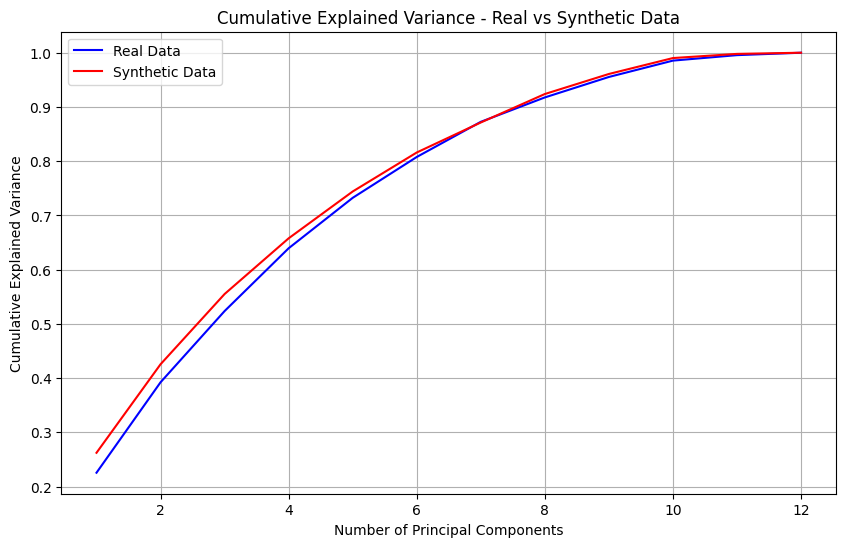

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data (important for PCA)
scaler = StandardScaler()
numeric_features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
# Scaling the real and synthetic datasets
real_data_scaled = scaler.fit_transform(data[numeric_features])
synthetic_data_scaled = scaler.fit_transform(synthetic_df[numeric_features])

# Perform PCA (using all components to examine cumulative variance)
pca_real = PCA().fit(real_data_scaled)
pca_synthetic = PCA().fit(synthetic_data_scaled)

# Explained variance ratio (individual variance explained by each component)
explained_variance_real = pca_real.explained_variance_ratio_
explained_variance_synthetic = pca_synthetic.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance_real = explained_variance_real.cumsum()
cumulative_variance_synthetic = explained_variance_synthetic.cumsum()

# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_real) + 1), cumulative_variance_real, label='Real Data', color='blue')
plt.plot(range(1, len(cumulative_variance_synthetic) + 1), cumulative_variance_synthetic, label='Synthetic Data', color='red')

# Customize the plot
plt.title('Cumulative Explained Variance - Real vs Synthetic Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


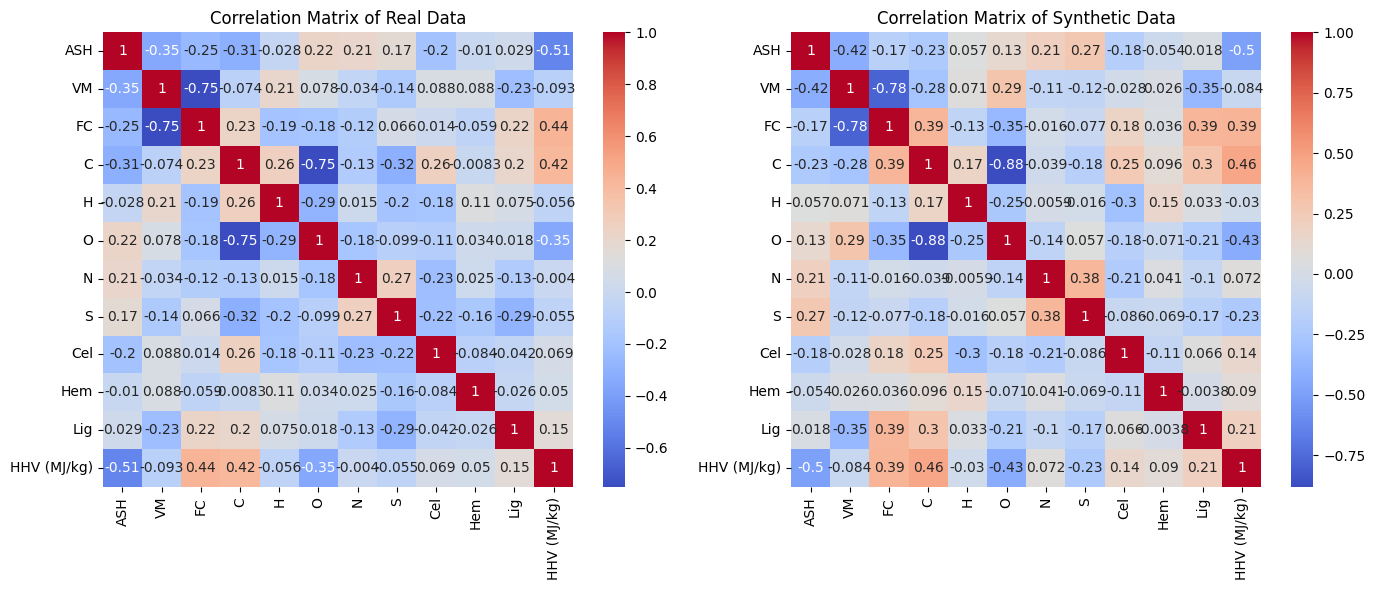

In [ ]:
import seaborn as sns

# Calculate correlation matrices
real_corr = pd.DataFrame(real_data_scaled, columns=numeric_features).corr()
synthetic_corr = pd.DataFrame(synthetic_data_scaled, columns=numeric_features).corr()

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(real_corr, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix of Real Data')

sns.heatmap(synthetic_corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix of Synthetic Data')

plt.tight_layout()
plt.show()


In [ ]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=22655376734d4ef7562231c17f50bb443ebb157c6d7c5c29386e93cc38d4fcbf
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


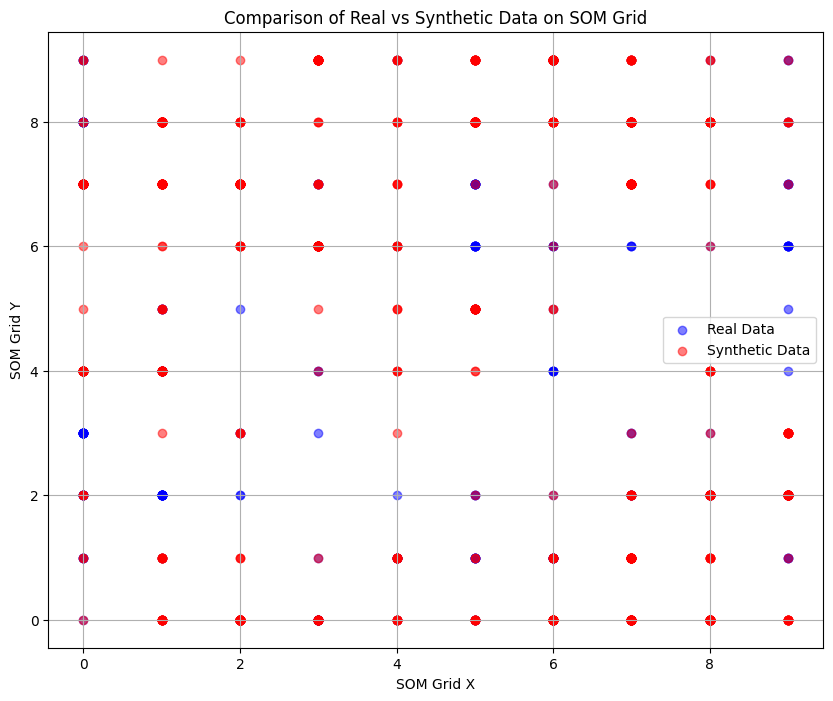

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

# Assume real_data and synthetic_data are already loaded and numeric

# Step 1: Scale the datasets
#scaler = StandardScaler()
#real_data_scaled = scaler.fit_transform(data)
#synthetic_data_scaled = scaler.fit_transform(synthetic_data)

# Step 2: Train SOM for Real Data
som_real = MiniSom(10, 10, real_data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som_real.train_random(real_data_scaled, 100)

# Step 3: Train SOM for Synthetic Data
som_synthetic = MiniSom(10, 10, synthetic_data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som_synthetic.train_random(synthetic_data_scaled, 100)

# Step 4: Map Real Data Points to SOM grid (for both datasets)
real_winners = np.array([som_real.winner(data) for data in real_data_scaled])  # Winning neurons for real data
synthetic_winners = np.array([som_synthetic.winner(data) for data in synthetic_data_scaled])  # Winning neurons for synthetic data

# Step 5: Visualization (Compare the two datasets)
plt.figure(figsize=(10, 8))

# Plot real data as blue dots
plt.scatter(real_winners[:, 0], real_winners[:, 1], color='blue', label='Real Data', alpha=0.5)

# Plot synthetic data as red dots
plt.scatter(synthetic_winners[:, 0], synthetic_winners[:, 1], color='red', label='Synthetic Data', alpha=0.5)

# Add titles and labels
plt.title('Comparison of Real vs Synthetic Data on SOM Grid')
plt.xlabel('SOM Grid X')
plt.ylabel('SOM Grid Y')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


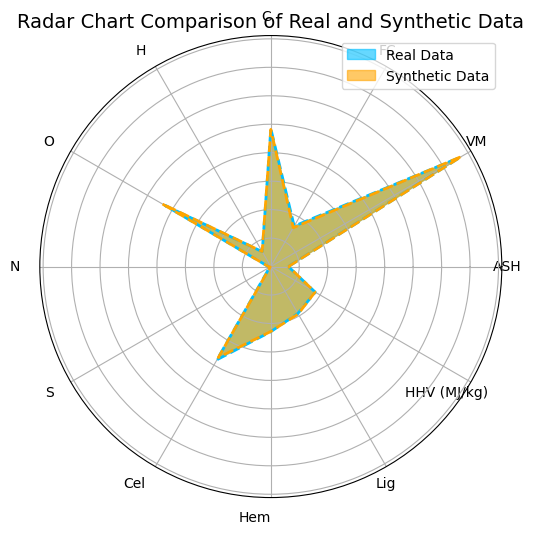

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean values for each feature
real_mean = data[numeric_features].mean()
synthetic_mean = synthetic_df[numeric_features].mean()

# Create radar chart
categories = numeric_features
N = len(categories)

real_values = real_mean.values
synthetic_values = synthetic_mean.values

# Define the angle for each feature
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Repeat the first value to close the radar chart
real_values = np.concatenate((real_values, [real_values[0]]))
synthetic_values = np.concatenate((synthetic_values, [synthetic_values[0]]))
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Fill the areas with colors
ax.fill(angles, real_values, color='deepskyblue', alpha=0.6, label='Real Data')
ax.fill(angles, synthetic_values, color='orange', alpha=0.6, label='Synthetic Data')

# Add a dashed outline for distinction
ax.plot(angles, real_values, color='deepskyblue', linewidth=2, linestyle='dashed')
ax.plot(angles, synthetic_values, color='orange', linewidth=2, linestyle='dashed')

# Hide the radial ticks
ax.set_yticklabels([])

# Set the angles and labels for each category
ax.set_xticks(angles[:-1])  # Removing the last duplicate angle
ax.set_xticklabels(categories, rotation=45, horizontalalignment='right')

# Add the title and legend
plt.title('Radar Chart Comparison of Real and Synthetic Data', fontsize=14)
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [ ]:
synthetic_df.to_csv('synthetic_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('synthetic_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

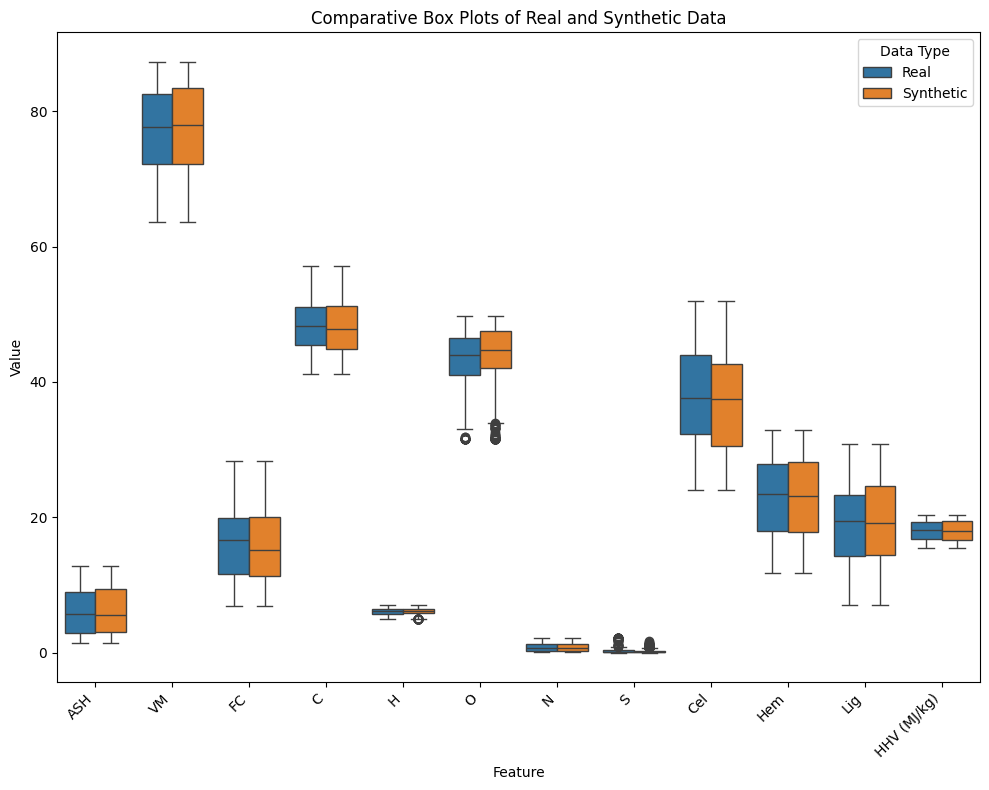

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the dataframes to long format for easier plotting
real_data_melt = pd.melt(data, value_vars=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'], var_name='Feature', value_name='Value')
synthetic_data_melt = pd.melt(synthetic_df, value_vars=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'], var_name='Feature', value_name='Value')

# Concatenate the melted dataframes and add a 'Data Type' column
real_data_melt['Data Type'] = 'Real'
synthetic_data_melt['Data Type'] = 'Synthetic'
all_data_melt = pd.concat([real_data_melt, synthetic_data_melt])

# Create the box plot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.boxplot(x='Feature', y='Value', hue='Data Type', data=all_data_melt)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Comparative Box Plots of Real and Synthetic Data')
plt.tight_layout()
plt.show()

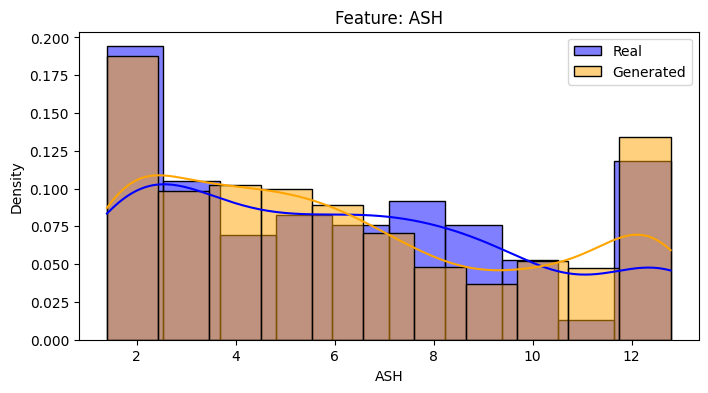

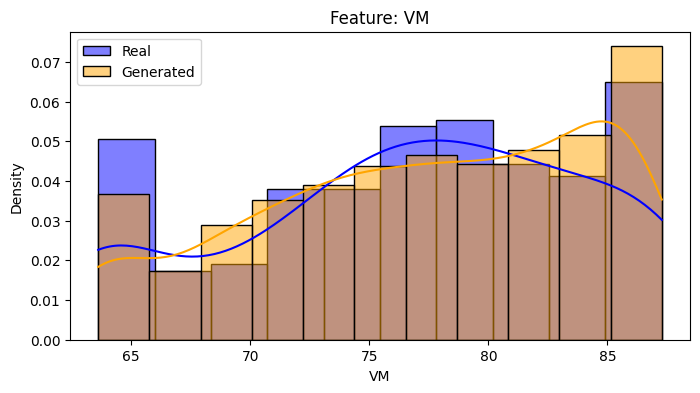

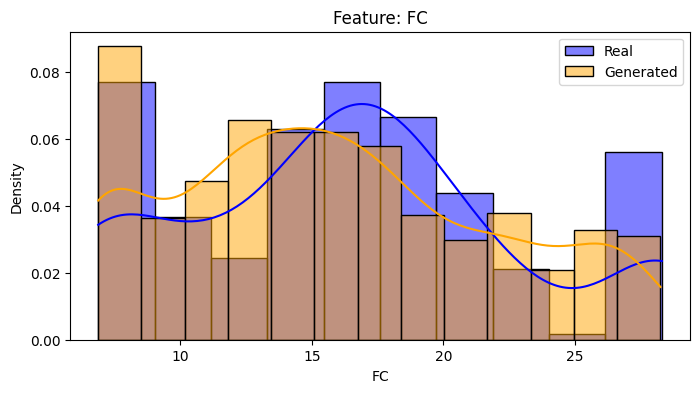

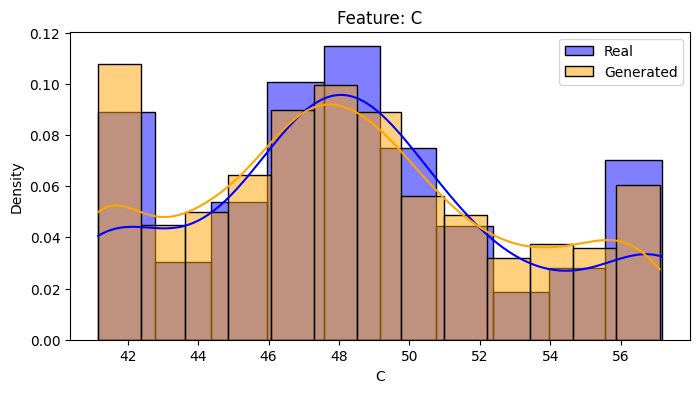

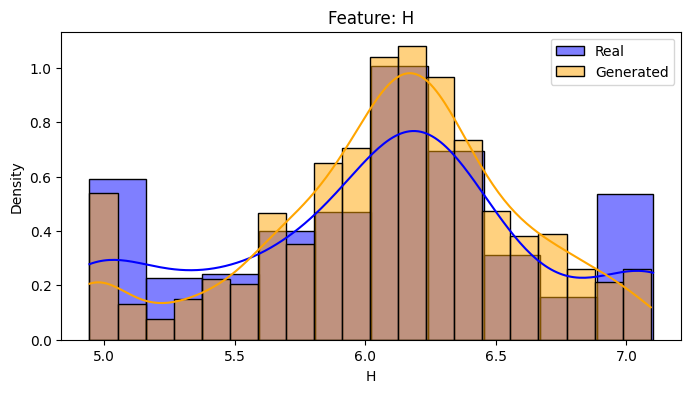

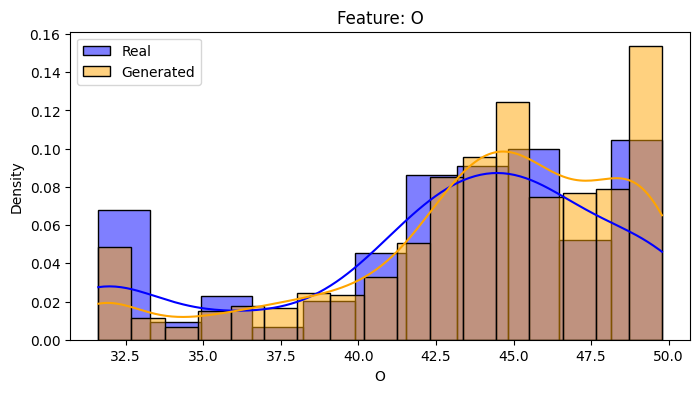

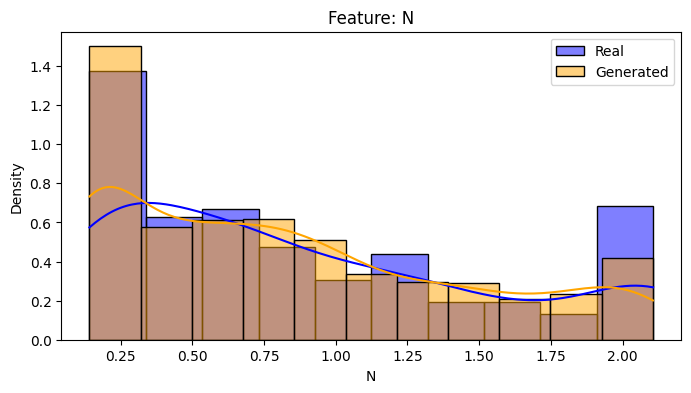

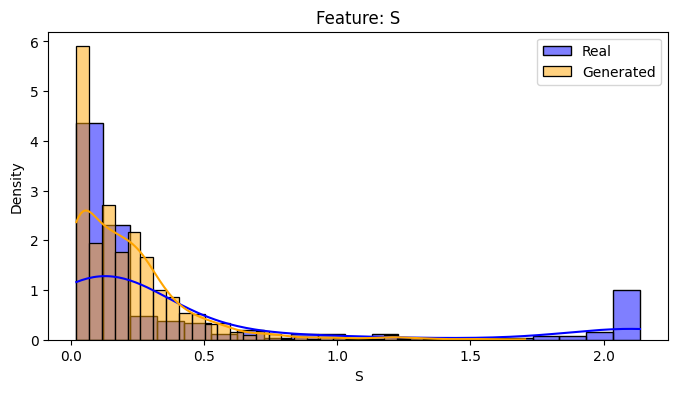

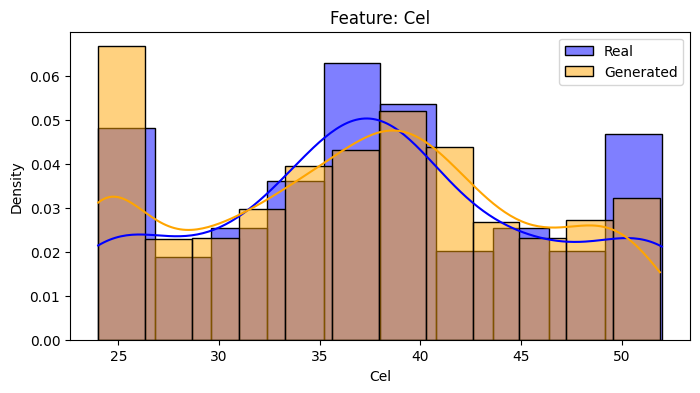

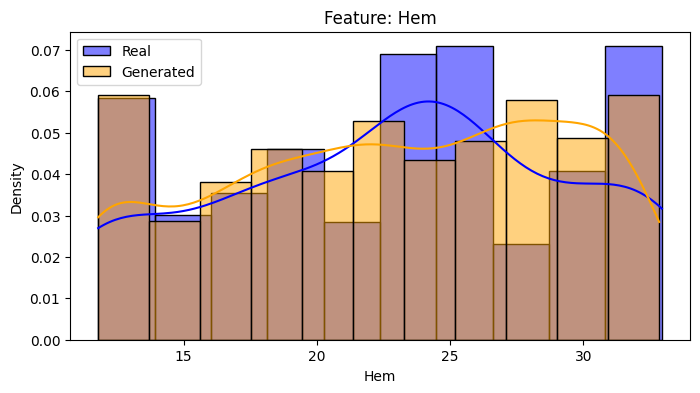

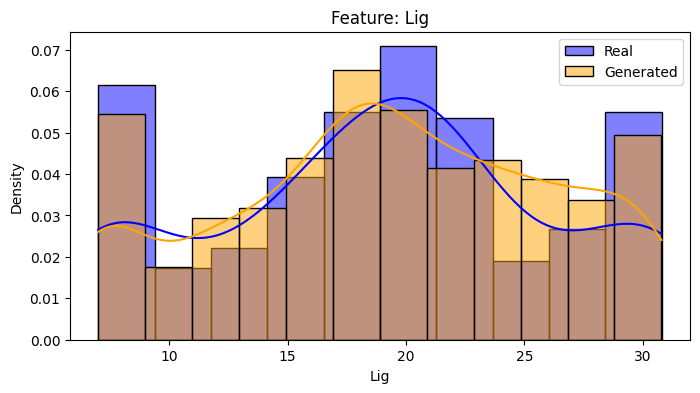

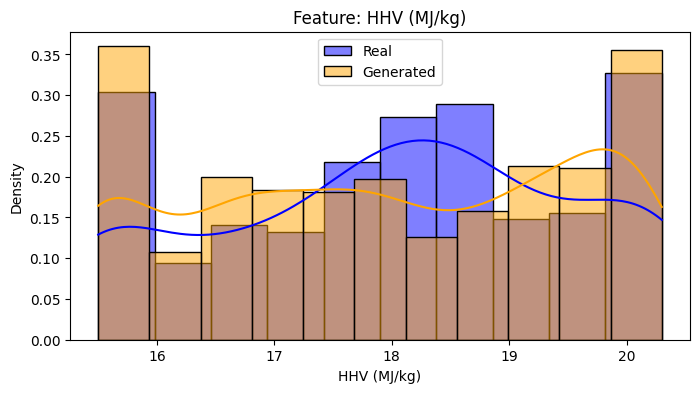

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


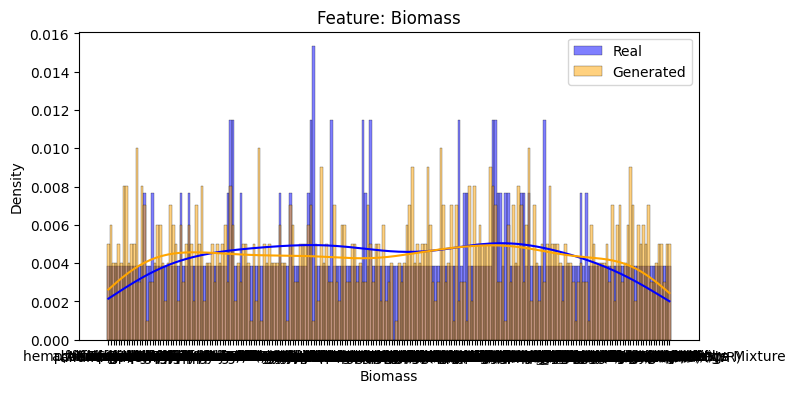

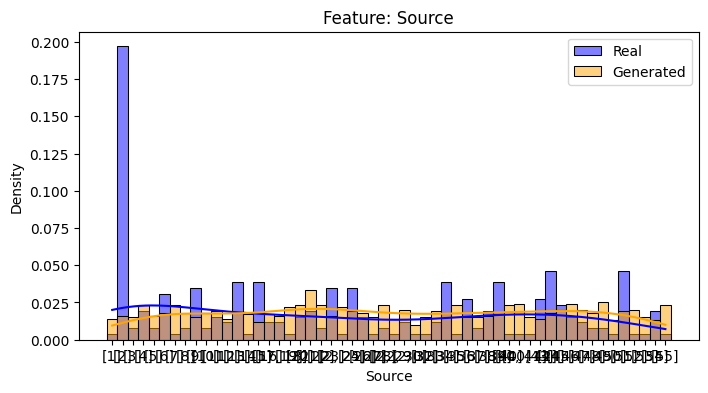

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in synthetic_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], color='blue', label='Real', kde=True, stat="density")
    sns.histplot(synthetic_df[column], color='orange', label='Generated', kde=True, stat="density")
    plt.title(f"Feature: {column}")
    plt.legend()
    plt.show()


**Regression Plots:**
Purpose: To visualize the relationship between two variables and identify potential predictors (features) for your target variable (HHV in this case). Reasoning: By observing the trend and scatter of points in the regression plot, you can get an idea of the strength and direction of the relationship between the two variables. A clear trend suggests a strong predictive relationship.

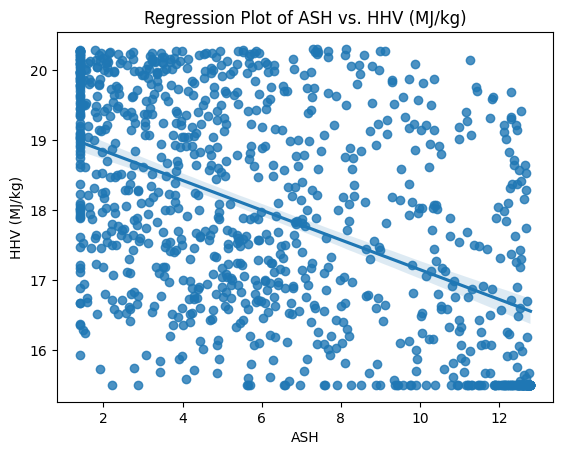

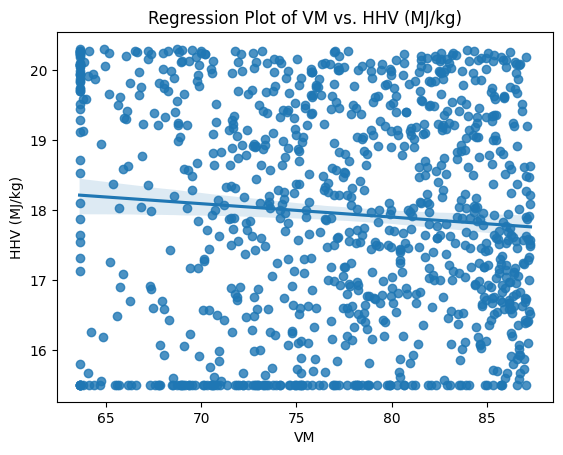

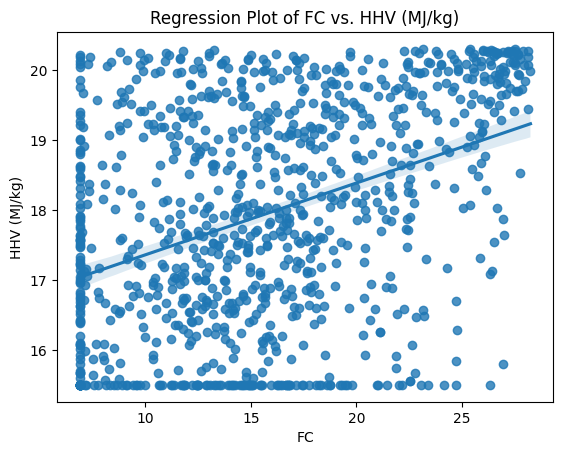

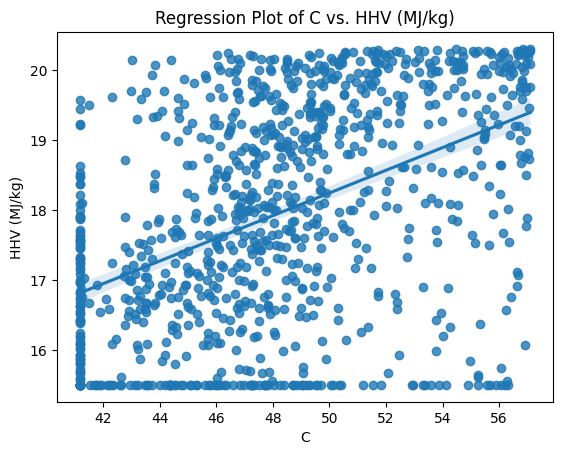

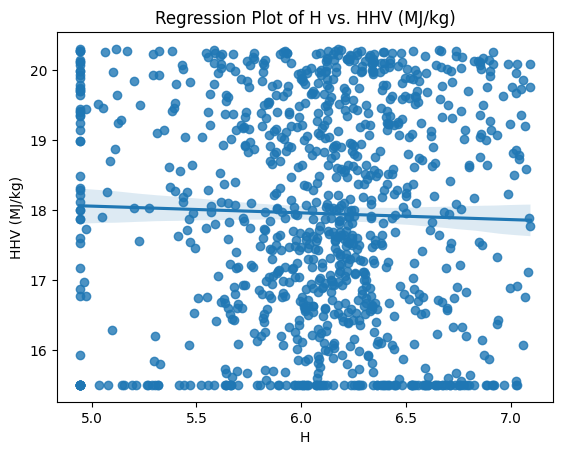

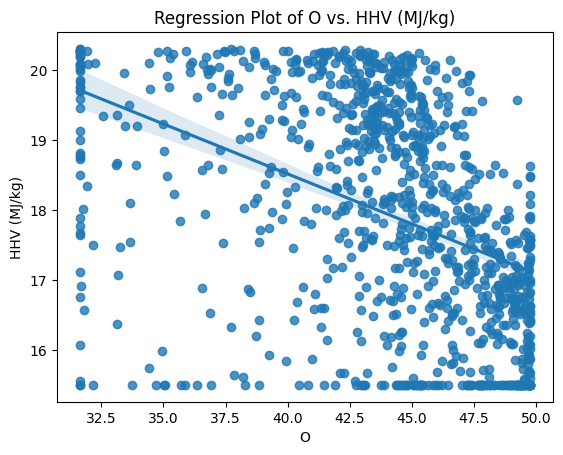

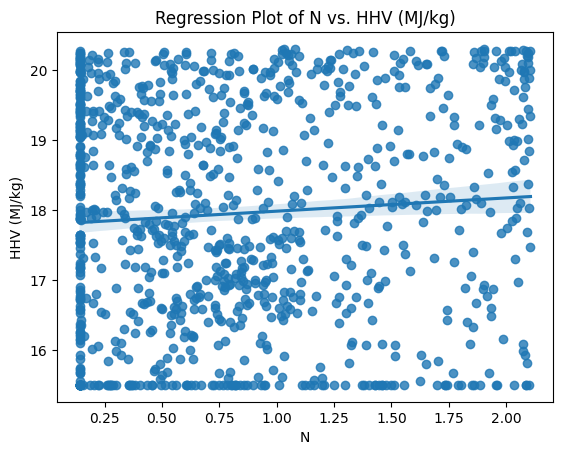

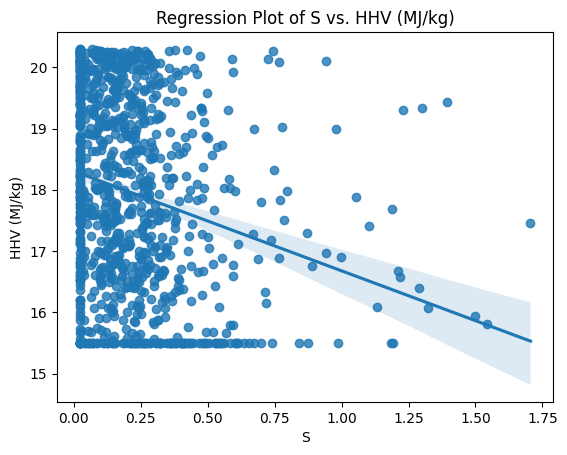

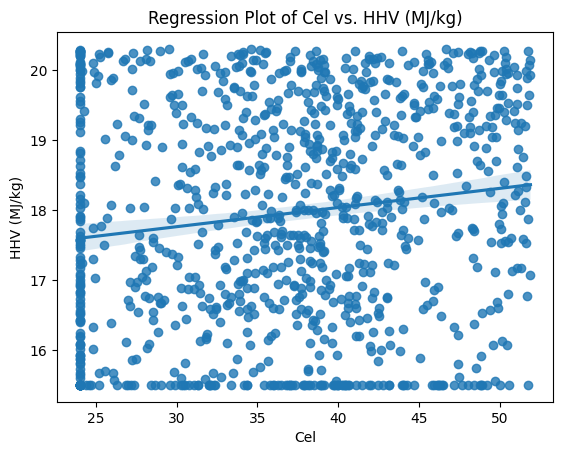

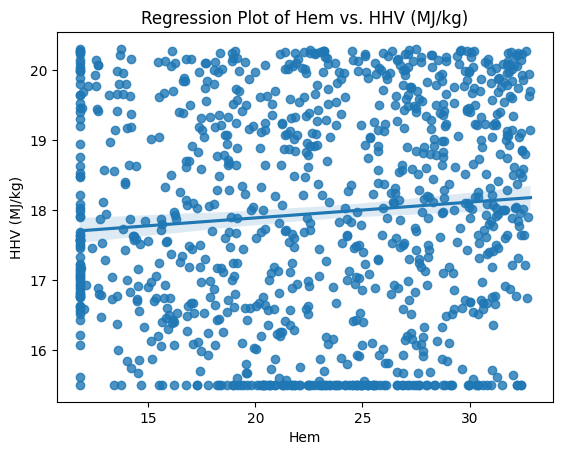

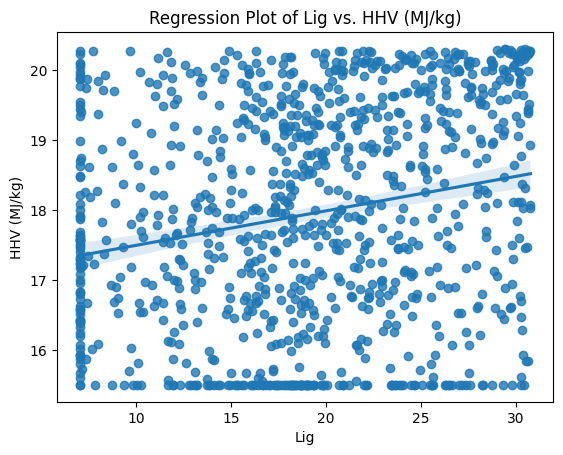

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot against 'HHV (MJ/kg)'
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']

# Loop through each column and create a regression plot
for column in columns_to_plot:
    sns.regplot(x=column, y='HHV (MJ/kg)', data=synthetic_df)
    plt.title(f'Regression Plot of {column} vs. HHV (MJ/kg)')  # Dynamic title
    plt.show()


**Step 1: Model Training, Cross-Validation, and Evaluation**

In [ ]:
!pip install tf-keras==2.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0


In [ ]:
#!pip install tensorflow
#pip install --upgrade tensorflow
!pip install tensorflow --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 968.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorfl

In [ ]:
import xgboost as xgb
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import tensorflow as tf
from sklearn.model_selection import GridSearchCV


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load datasets
real_data = data
synthetic_data = synthetic_df

# Define features and targets
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
targets = ['Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Split real data into training and testing sets
X_real = real_data[features]
y_real = real_data[targets]
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Split synthetic data into training and testing sets
X_synthetic = synthetic_data[features]
y_synthetic = synthetic_data[targets]
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(
    X_synthetic, y_synthetic, test_size=0.3, random_state=42)


In [ ]:
!pip install shap
!pip install lightgbm



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load example datasets as placeholders for real_data and synthetic_data
# Replace these with your actual 'data' and 'synthetic_df' variables
from sklearn.datasets import make_regression

X_real, y_real = make_regression(n_samples=200, n_features=8, n_targets=4, noise=0.1, random_state=42)
real_data = pd.DataFrame(X_real, columns=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S'])
targets_data = pd.DataFrame(y_real, columns=['Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'])
real_data = pd.concat([real_data, targets_data], axis=1)

X_syn, y_syn = make_regression(n_samples=200, n_features=8, n_targets=4, noise=0.5, random_state=123)
synthetic_data = pd.DataFrame(X_syn, columns=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S'])
targets_synthetic = pd.DataFrame(y_syn, columns=['Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'])
synthetic_data = pd.concat([synthetic_data, targets_synthetic], axis=1)

# Define features and targets
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
targets = ['Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Split real and synthetic data into train and test sets
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
    real_data[features], real_data[targets], test_size=0.3, random_state=42
)
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
    synthetic_data[features], synthetic_data[targets], test_size=0.3, random_state=42
)

# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Simplified pipeline (no feature selection)
def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

models = {
    "Random Forest": create_pipeline(RandomForestRegressor(random_state=42)),
    "Extra Trees": create_pipeline(ExtraTreesRegressor(random_state=42)),
    "XGBoost": create_pipeline(MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', random_state=42)))
}

# Refined hyperparameter grids
param_grids = {
    "Random Forest": {
        'model__n_estimators': [200, 300],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [5, 10],
        'model__min_samples_leaf': [2, 4],
        'model__max_features': ['sqrt', 'log2']
    },
    "Extra Trees": {
        'model__n_estimators': [200, 300],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [5, 10],
        'model__min_samples_leaf': [2, 4],
        'model__max_features': ['sqrt', 'log2']
    },
    "XGBoost": {
        'model__estimator__n_estimators': [200],
        'model__estimator__learning_rate': [0.05],
        'model__estimator__max_depth': [6],
        'model__estimator__subsample': [0.8],
        'model__estimator__colsample_bytree': [0.8]
    }
}

# Function to run hyperparameter tuning and evaluation
def hyperparameter_tuning_evaluation(model, X_train, y_train, X_test, y_test, model_name, dataset_name):
    random_search = RandomizedSearchCV(
        model, param_grids[model_name],
        n_iter=5, cv=cv, scoring='neg_mean_squared_error',
        random_state=42, verbose=0, n_jobs=-1
    )

    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
    mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred, multioutput='raw_values')

    results = pd.DataFrame({
        'Target': targets,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })
    results['Model'] = model_name
    results['Dataset'] = dataset_name

    return results

# Evaluate all models on both datasets
all_results = []

for model_name in models.keys():
    # Real Data
    res_real = hyperparameter_tuning_evaluation(models[model_name], X_real_train, y_real_train, X_real_test, y_real_test, model_name, "Real Data")
    all_results.append(res_real)

    # Synthetic Data
    res_syn = hyperparameter_tuning_evaluation(models[model_name], X_syn_train, y_syn_train, X_syn_test, y_syn_test, model_name, "Synthetic Data")
    all_results.append(res_syn)

# Combine and display all results
final_results_df = pd.concat(all_results, ignore_index=True)
print("\n\nFinal Evaluation Metrics:")
print(final_results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(




Final Evaluation Metrics:
         Target      MSE   MAE   RMSE   R2          Model         Dataset
0           Cel 11805.01 85.62 108.65 0.57  Random Forest       Real Data
1           Hem 13250.59 93.17 115.11 0.64  Random Forest       Real Data
2           Lig  4315.09 51.44  65.69 0.63  Random Forest       Real Data
3   HHV (MJ/kg)  7597.93 69.79  87.17 0.62  Random Forest       Real Data
4           Cel 13816.49 87.75 117.54 0.62  Random Forest  Synthetic Data
5           Hem 10013.57 77.71 100.07 0.60  Random Forest  Synthetic Data
6           Lig 13546.40 94.34 116.39 0.64  Random Forest  Synthetic Data
7   HHV (MJ/kg)  5190.02 57.21  72.04 0.60  Random Forest  Synthetic Data
8           Cel 11132.63 83.00 105.51 0.59    Extra Trees       Real Data
9           Hem 12846.89 90.25 113.34 0.65    Extra Trees       Real Data
10          Lig  4739.19 56.51  68.84 0.60    Extra Trees       Real Data
11  HHV (MJ/kg)  7687.86 67.85  87.68 0.61    Extra Trees       Real Data
12        

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.0 MB/s eta 0:00:00


In [ ]:
# 📦 Libraries
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# ✅ Feature/target setup
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'
real_df = data
synthetic_cleaned = synthetic_df

# ✅ Combine real and cleaned synthetic data
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]], ignore_index=True).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])  # Log-transform

# ✅ Train-test split
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Feature Selection (Top 8)
xgb_shap = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_shap.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_shap)
shap_values = explainer(X_train_scaled)
shap_importance = np.abs(shap_values.values).mean(axis=0)

top_k = 8  # Increase number of features
selected_features = pd.Series(shap_importance, index=X.columns).sort_values(ascending=False).index[:top_k].tolist()
print("Selected Features:", selected_features)

# ✅ Filter and scale selected features
X_train_top = scaler.fit_transform(X_train[selected_features])
X_test_top = scaler.transform(X_test[selected_features])

# ✅ Optuna tuning with 5-fold CV
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
    }
    model = XGBRegressor(objective='reg:squarederror', random_state=42, **params)
    score = cross_val_score(model, X_train_top, y_train, cv=5, scoring='r2', n_jobs=-1)
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# ✅ Train final model
best_params = study.best_params
final_model = XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
final_model.fit(X_train_top, y_train)

# ✅ Predict & inverse transform
y_pred_log = final_model.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# ✅ Evaluation
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Final HHV Prediction Results:")
print(f"Best Params: {best_params}")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


[I 2025-04-13 04:40:12,788] A new study created in memory with name: no-name-a03aa9f4-7771-4de4-852a-6b4df34bd2fd


Selected Features: ['O', 'ASH', 'FC', 'N', 'S', 'C', 'H', 'VM']


[I 2025-04-13 04:40:13,658] Trial 0 finished with value: 0.3689401799532361 and parameters: {'n_estimators': 1436, 'learning_rate': 0.0551018015770497, 'max_depth': 11, 'subsample': 0.940423504978901, 'colsample_bytree': 0.8982196221645007, 'gamma': 0.31310856403223764, 'reg_alpha': 0.26664890064104807, 'reg_lambda': 0.02601188171825708}. Best is trial 0 with value: 0.3689401799532361.
[I 2025-04-13 04:40:14,121] Trial 1 finished with value: 0.44839136928542433 and parameters: {'n_estimators': 744, 'learning_rate': 0.28165564093889367, 'max_depth': 4, 'subsample': 0.6915958558115531, 'colsample_bytree': 0.9675529588178823, 'gamma': 0.13348684695829094, 'reg_alpha': 0.87065473800586, 'reg_lambda': 0.13149358966837177}. Best is trial 1 with value: 0.44839136928542433.
[I 2025-04-13 04:40:14,431] Trial 2 finished with value: 0.390303840194456 and parameters: {'n_estimators': 503, 'learning_rate': 0.19458918278384554, 'max_depth': 12, 'subsample': 0.7043444617929937, 'colsample_bytree': 0.


📈 Final HHV Prediction Results:
Best Params: {'n_estimators': 1901, 'learning_rate': 0.05122237945355305, 'max_depth': 10, 'subsample': 0.6349827452350805, 'colsample_bytree': 0.9512653685039103, 'gamma': 0.001102246582402653, 'reg_alpha': 0.5111881245726052, 'reg_lambda': 0.11760144795210084}
R²:  0.6132
RMSE: 0.9775
MAE:  0.7422


In [ ]:
# 📦 Libraries
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Inputs (replace with actual DataFrames if needed)
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'
real_df = data
synthetic_cleaned = synthetic_df


# ✅ Combine real and synthetic cleaned data
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]], ignore_index=True).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])  # Log-transform

# ✅ Split & scale
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Selection
xgb_shap = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_shap.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_shap)
shap_values = explainer(X_train_scaled)
shap_importance = np.abs(shap_values.values).mean(axis=0)
top_k = 8
selected_features = pd.Series(shap_importance, index=X.columns).sort_values(ascending=False).index[:top_k].tolist()

X_train_top = scaler.fit_transform(X_train[selected_features])
X_test_top = scaler.transform(X_test[selected_features])

# ✅ XGBoost Ensemble Models
xgb1 = XGBRegressor(n_estimators=1473, learning_rate=0.013, max_depth=16, subsample=0.78,
                    colsample_bytree=0.84, gamma=0.0015, reg_alpha=0.25, reg_lambda=0.4,
                    objective='reg:squarederror', random_state=42)

xgb2 = XGBRegressor(n_estimators=1000, learning_rate=0.08, max_depth=6, subsample=0.85,
                    colsample_bytree=0.75, gamma=0.005, reg_alpha=0.3, reg_lambda=0.5,
                    objective='reg:squarederror', random_state=24)

xgb3 = XGBRegressor(n_estimators=1800, learning_rate=0.2, max_depth=10, subsample=0.7,
                    colsample_bytree=0.8, gamma=0.002, reg_alpha=0.2, reg_lambda=0.6,
                    objective='reg:squarederror', random_state=99)

ensemble_model = VotingRegressor(estimators=[
    ('xgb1', xgb1),
    ('xgb2', xgb2),
    ('xgb3', xgb3)
])

# ✅ Train and Evaluate
ensemble_model.fit(X_train_top, y_train)
y_pred_log = ensemble_model.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Final HHV Prediction Results (XGBoost Ensemble):")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")



📈 Final HHV Prediction Results (XGBoost Ensemble):
R²:  0.6090
RMSE: 0.9829
MAE:  0.7452


In [ ]:
# 📦 Libraries
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Define your real and cleaned synthetic data
# Replace these with your actual loaded DataFrames
real_df = data
synthetic_cleaned = synthetic_df

# ✅ Columns
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'

# ✅ Combine and log-transform
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]], ignore_index=True).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])

# ✅ Split & scale
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP feature selection (Top 8)
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_values = explainer(X_train_scaled)
shap_importance = np.abs(shap_values.values).mean(axis=0)
top_k = 8
selected_features = pd.Series(shap_importance, index=X.columns).sort_values(ascending=False).index[:top_k].tolist()

X_train_top = scaler.fit_transform(X_train[selected_features])
X_test_top = scaler.transform(X_test[selected_features])

# ✅ 1. Optuna-tuned XGBoost model
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 800, 2500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
    }
    model = XGBRegressor(objective='reg:squarederror', random_state=42, **params)
    score = cross_val_score(model, X_train_top, y_train, cv=5, scoring='r2', n_jobs=-1)
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# ✅ Train best model
best_params = study.best_params
xgb_best = XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
xgb_best.fit(X_train_top, y_train)

# ✅ 2. Ensemble XGBoost models
xgb1 = XGBRegressor(n_estimators=1473, learning_rate=0.013, max_depth=16, subsample=0.78,
                    colsample_bytree=0.84, gamma=0.0015, reg_alpha=0.25, reg_lambda=0.4,
                    objective='reg:squarederror', random_state=42)
xgb2 = XGBRegressor(n_estimators=1000, learning_rate=0.08, max_depth=6, subsample=0.85,
                    colsample_bytree=0.75, gamma=0.005, reg_alpha=0.3, reg_lambda=0.5,
                    objective='reg:squarederror', random_state=24)
xgb3 = XGBRegressor(n_estimators=1800, learning_rate=0.2, max_depth=10, subsample=0.7,
                    colsample_bytree=0.8, gamma=0.002, reg_alpha=0.2, reg_lambda=0.6,
                    objective='reg:squarederror', random_state=99)

ensemble_model = VotingRegressor(estimators=[
    ('xgb1', xgb1),
    ('xgb2', xgb2),
    ('xgb3', xgb3)
])

ensemble_model.fit(X_train_top, y_train)

# ✅ Evaluate both models
def evaluate(model, X_test_top, y_test, label):
    y_pred_log = model.predict(X_test_top)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n📈 {label} Results:")
    print(f"R²:  {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    return r2

# 🔍 Final results
evaluate(xgb_best, X_test_top, y_test, "Optuna XGBoost")
evaluate(ensemble_model, X_test_top, y_test, "XGBoost Ensemble")


[I 2025-04-13 04:45:56,687] A new study created in memory with name: no-name-0a369e84-4f4a-4cea-9ca7-db5132702d8b
[I 2025-04-13 04:45:57,886] Trial 0 finished with value: 0.17252758019147518 and parameters: {'n_estimators': 1154, 'learning_rate': 0.06816229668439797, 'max_depth': 11, 'subsample': 0.9021673395577544, 'colsample_bytree': 0.685213091908357, 'gamma': 0.7324981880612564, 'reg_alpha': 0.29765768636808776, 'reg_lambda': 0.04141809676987074}. Best is trial 0 with value: 0.17252758019147518.
[I 2025-04-13 04:45:58,602] Trial 1 finished with value: 0.36344643016247147 and parameters: {'n_estimators': 1173, 'learning_rate': 0.05264977616321759, 'max_depth': 7, 'subsample': 0.7166957170644912, 'colsample_bytree': 0.7598196738008725, 'gamma': 0.2537619962990276, 'reg_alpha': 0.6190398372412053, 'reg_lambda': 0.6632301624270341}. Best is trial 1 with value: 0.36344643016247147.
[I 2025-04-13 04:45:59,579] Trial 2 finished with value: 0.2014767815610604 and parameters: {'n_estimators


📈 Optuna XGBoost Results:
R²:  0.6036
RMSE: 0.9896
MAE:  0.7527

📈 XGBoost Ensemble Results:
R²:  0.6090
RMSE: 0.9829
MAE:  0.7452


0.6089793147093775

In [ ]:
# 📦 Libraries
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Inputs
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'
real_df = data
synthetic_cleaned = synthetic_df

# ✅ Combine & clean
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]]).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])

# ✅ Split & scale
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Selection
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_vals = explainer(X_train_scaled)
shap_imp = np.abs(shap_vals.values).mean(axis=0)
top_features = pd.Series(shap_imp, index=X.columns).sort_values(ascending=False).index[:8].tolist()

X_train_top = scaler.fit_transform(X_train[top_features])
X_test_top = scaler.transform(X_test[top_features])

# ✅ Optuna Objective
def make_objective(X_train, y_train, seed):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
        }
        model = XGBRegressor(objective='reg:squarederror', random_state=seed, **params)
        return cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return objective

# ✅ Run 3 Optuna Studies (independent random seeds)
best_models = []
for seed in [42, 24, 99]:
    study = optuna.create_study(direction='maximize')
    study.optimize(make_objective(X_train_top, y_train, seed), n_trials=30)
    best_params = study.best_params
    model = XGBRegressor(objective='reg:squarederror', random_state=seed, **best_params)
    model.fit(X_train_top, y_train)
    best_models.append(('xgb_' + str(seed), model))

# ✅ Ensemble
ensemble = VotingRegressor(estimators=best_models)
ensemble.fit(X_train_top, y_train)

# ✅ Evaluate
y_pred_log = ensemble.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Final HHV Prediction Results (Optuna-Tuned XGBoost Ensemble):")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


[I 2025-04-13 05:05:32,660] A new study created in memory with name: no-name-89371432-fb1f-4f6b-90a9-51ce139543d4
[I 2025-04-13 05:05:36,642] Trial 0 finished with value: 0.3241744856848447 and parameters: {'n_estimators': 1389, 'learning_rate': 0.2791183204989623, 'max_depth': 5, 'subsample': 0.9961581144258835, 'colsample_bytree': 0.600873834645968, 'gamma': 0.4136123374888727, 'reg_alpha': 0.3962040289968404, 'reg_lambda': 0.6734411058717072}. Best is trial 0 with value: 0.3241744856848447.
[I 2025-04-13 05:05:37,729] Trial 1 finished with value: 0.20477136812829508 and parameters: {'n_estimators': 1798, 'learning_rate': 0.2729893413181742, 'max_depth': 8, 'subsample': 0.962788810079447, 'colsample_bytree': 0.9781653253234248, 'gamma': 0.6700419557139737, 'reg_alpha': 0.9842982167271668, 'reg_lambda': 0.2020057702642435}. Best is trial 0 with value: 0.3241744856848447.
[I 2025-04-13 05:05:39,142] Trial 2 finished with value: 0.11993109175139097 and parameters: {'n_estimators': 2424,


📈 Final HHV Prediction Results (Optuna-Tuned XGBoost Ensemble):
R²:  0.6001
RMSE: 0.9939
MAE:  0.7567


In [ ]:
# 📦 Install Requirements
!pip install optuna shap xgboost --quiet

# 📚 Imports
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Inputs
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'

# Use your real_df and synthetic_cleaned DataFrames
# real_df = ...
# synthetic_cleaned = ...

# ✅ Combine & clean
combined_df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]]).dropna()
combined_df['log_HHV'] = np.log1p(combined_df[target])  # log-transform

# ✅ Train-test split
X = combined_df[features]
y = combined_df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Feature Selection
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_vals = explainer(X_train_scaled)
shap_imp = np.abs(shap_vals.values).mean(axis=0)
top_features = pd.Series(shap_imp, index=X.columns).sort_values(ascending=False).index[:8].tolist()

# ✅ Re-scale selected features
X_train_top = scaler.fit_transform(X_train[top_features])
X_test_top = scaler.transform(X_test[top_features])

# ✅ Define Optuna objective
def make_objective(X_train, y_train, seed):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
        }
        model = XGBRegressor(objective='reg:squarederror', random_state=seed, **params)
        return cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return objective

# ✅ Tune 3 models with different random seeds
best_models = []
for seed in [42, 24, 99]:
    study = optuna.create_study(direction='maximize')
    study.optimize(make_objective(X_train_top, y_train, seed), n_trials=30)
    best_params = study.best_params
    model = XGBRegressor(objective='reg:squarederror', random_state=seed, **best_params)
    model.fit(X_train_top, y_train)
    best_models.append((f"xgb_{seed}", model))

# ✅ Create Voting Ensemble
ensemble = VotingRegressor(estimators=best_models)
ensemble.fit(X_train_top, y_train)

# ✅ Evaluation
y_pred_log = ensemble.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Final HHV Prediction Results (Optuna-Tuned XGBoost Ensemble):")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


[I 2025-04-13 12:01:56,831] A new study created in memory with name: no-name-6fb28904-470d-46e4-ae65-7b5ce7b42fb0
[I 2025-04-13 12:01:59,660] Trial 0 finished with value: 0.19894265573092068 and parameters: {'n_estimators': 1189, 'learning_rate': 0.19442042498397044, 'max_depth': 4, 'subsample': 0.771779233323398, 'colsample_bytree': 0.8573151389967197, 'gamma': 0.653362726482181, 'reg_alpha': 0.32161515861545387, 'reg_lambda': 0.5469310929598556}. Best is trial 0 with value: 0.19894265573092068.
[I 2025-04-13 12:02:00,496] Trial 1 finished with value: 0.4164834957933066 and parameters: {'n_estimators': 1685, 'learning_rate': 0.04181065361238619, 'max_depth': 6, 'subsample': 0.9452890626110553, 'colsample_bytree': 0.6721673961621492, 'gamma': 0.2093111208608508, 'reg_alpha': 0.33636449660700096, 'reg_lambda': 0.7616940829275445}. Best is trial 1 with value: 0.4164834957933066.
[I 2025-04-13 12:02:00,868] Trial 2 finished with value: 0.14483275591054354 and parameters: {'n_estimators': 


📈 Final HHV Prediction Results (Optuna-Tuned XGBoost Ensemble):
R²:  0.6077
RMSE: 0.9845
MAE:  0.7456


In [ ]:
# 📦 Install
!pip install optuna shap xgboost --quiet

# 📚 Imports
import optuna
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ✅ Features and Target
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'
real_df = data
synthetic_cleaned = synthetic_df
# ✅ Combine real and synthetic data
df = pd.concat([real_df[features + [target]], synthetic_cleaned[features + [target]]]).dropna()

# ✅ Feature Engineering
df['C_H'] = df['C'] * df['H']
df['FC_O'] = df['FC'] / (df['O'] + 1e-5)
df['VM_ASH'] = df['VM'] * df['ASH']
df['log_HHV'] = np.log1p(df[target])

# ✅ Update feature list
all_features = features + ['C_H', 'FC_O', 'VM_ASH']

# ✅ Split
X = df[all_features]
y = df['log_HHV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP for Feature Selection
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_vals = explainer(X_train_scaled)
shap_imp = np.abs(shap_vals.values).mean(axis=0)
top_features = pd.Series(shap_imp, index=X.columns).sort_values(ascending=False).index[:10].tolist()

# ✅ Filter top features
X_train_top = scaler.fit_transform(X_train[top_features])
X_test_top = scaler.transform(X_test[top_features])

# ✅ Optuna Objective Function
def make_objective(X_train, y_train, seed):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
        }
        model = XGBRegressor(objective='reg:squarederror', random_state=seed, **params)
        return cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return objective

# ✅ Train 3 Optuna-Tuned Models
best_models = []
for seed in [42, 24, 99]:
    study = optuna.create_study(direction='maximize')
    study.optimize(make_objective(X_train_top, y_train, seed), n_trials=30)
    model = XGBRegressor(objective='reg:squarederror', random_state=seed, **study.best_params)
    model.fit(X_train_top, y_train)
    best_models.append((f"xgb_{seed}", model))

# ✅ Voting Ensemble
ensemble = VotingRegressor(estimators=best_models)
ensemble.fit(X_train_top, y_train)

# ✅ Evaluate
y_pred_log = ensemble.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 Improved HHV Prediction with Feature Engineering + XGBoost Ensemble:")
print(f"R²:  {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


[I 2025-04-13 12:10:58,368] A new study created in memory with name: no-name-12bc69b2-8de4-46d1-8289-03b7ffed37b3
[I 2025-04-13 12:10:59,067] Trial 0 finished with value: 0.44268470860679277 and parameters: {'n_estimators': 1133, 'learning_rate': 0.22376973471093353, 'max_depth': 9, 'subsample': 0.7807370834841627, 'colsample_bytree': 0.7470174731521455, 'gamma': 0.16598485242609096, 'reg_alpha': 0.8429332429850451, 'reg_lambda': 0.7123763179485544}. Best is trial 0 with value: 0.44268470860679277.
[I 2025-04-13 12:11:00,111] Trial 1 finished with value: 0.25900692062145225 and parameters: {'n_estimators': 1854, 'learning_rate': 0.2418369346220988, 'max_depth': 11, 'subsample': 0.7723406844993933, 'colsample_bytree': 0.6241937894014834, 'gamma': 0.5863923552582938, 'reg_alpha': 0.6980431085724966, 'reg_lambda': 0.543295481569545}. Best is trial 0 with value: 0.44268470860679277.
[I 2025-04-13 12:11:00,866] Trial 2 finished with value: 0.2359019852769218 and parameters: {'n_estimators':


📈 Improved HHV Prediction with Feature Engineering + XGBoost Ensemble:
R²:  0.6107
RMSE: 0.9807
MAE:  0.7530


In [ ]:
# 📦 Install dependencies
!pip install optuna shap xgboost --quiet

# 📚 Imports
import pandas as pd
import numpy as np
import optuna
import shap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

# ✅ Inputs
real_df = data
# synthetic_df = pd.read_csv('your_synthetic_data.csv')

features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
target = 'HHV (MJ/kg)'

# ✅ Step 1: Combine & dropna/duplicates
df = pd.concat([real_df[features + [target]], synthetic_df[features + [target]]]).dropna().drop_duplicates()

# ✅ Step 2: Apply only reasonable bounds (skip IQR filtering)
conditions = (
    (df['ASH'] >= 0) & (df['ASH'] <= 50) &
    (df['VM'] >= 0) & (df['VM'] <= 100) &
    (df['FC'] >= 0) & (df['FC'] <= 50) &
    (df['C'] >= 30) & (df['C'] <= 70) &
    (df['H'] >= 2) & (df['H'] <= 15) &
    (df['O'] >= 10) & (df['O'] <= 60) &
    (df['N'] >= 0) & (df['N'] <= 10) &
    (df['S'] >= 0) & (df['S'] <= 5)
)
df = df[conditions]

# ✅ Step 3: Feature engineering
df['C_H'] = df['C'] * df['H']
df['FC_O'] = df['FC'] / (df['O'] + 1e-5)
df['VM_ASH'] = df['VM'] * df['ASH']
df['log_HHV'] = np.log1p(df[target])  # Target transform

# ✅ Final features
all_features = features + ['C_H', 'FC_O', 'VM_ASH']
X = df[all_features]
y = df['log_HHV']

# ✅ Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ SHAP Feature Selection
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_base.fit(X_train_scaled, y_train)
explainer = shap.Explainer(xgb_base)
shap_vals = explainer(X_train_scaled)
shap_imp = np.abs(shap_vals.values).mean(axis=0)
top_features = pd.Series(shap_imp, index=X.columns).sort_values(ascending=False).index[:10].tolist()

# ✅ Top features only
X_train_top = scaler.fit_transform(X_train[top_features])
X_test_top = scaler.transform(X_test[top_features])

# ✅ Optuna tuning function
def make_objective(X_train, y_train, seed):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0)
        }
        model = XGBRegressor(objective='reg:squarederror', random_state=seed, **params)
        return cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return objective

# ✅ Train 3 models
best_models = []
for seed in [42, 24, 99]:
    study = optuna.create_study(direction='maximize')
    study.optimize(make_objective(X_train_top, y_train, seed), n_trials=30)
    model = XGBRegressor(objective='reg:squarederror', random_state=seed, **study.best_params)
    model.fit(X_train_top, y_train)
    best_models.append((f"xgb_{seed}", model))

# ✅ Ensemble
ensemble = VotingRegressor(estimators=best_models)
ensemble.fit(X_train_top, y_train)

# ✅ Predict
y_pred_log = ensemble.predict(X_test_top)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# ✅ Evaluate
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("\n📈 HHV Prediction with Okolie-Lite Cleaning + XGBoost Ensemble:")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")


[I 2025-04-14 01:03:45,700] A new study created in memory with name: no-name-40ecf4be-32eb-486f-85a5-fcd0ef03a797
[I 2025-04-14 01:03:47,272] Trial 0 finished with value: 0.181124535373287 and parameters: {'n_estimators': 1160, 'learning_rate': 0.1220140417738301, 'max_depth': 4, 'subsample': 0.9465400674885374, 'colsample_bytree': 0.7140335038510941, 'gamma': 0.7664381545421316, 'reg_alpha': 0.2992623797703946, 'reg_lambda': 0.5507140258049117}. Best is trial 0 with value: 0.181124535373287.
[I 2025-04-14 01:03:47,960] Trial 1 finished with value: 0.1539102655807909 and parameters: {'n_estimators': 514, 'learning_rate': 0.2867584461638811, 'max_depth': 5, 'subsample': 0.9867469163264717, 'colsample_bytree': 0.9294466498347744, 'gamma': 0.8727004402491493, 'reg_alpha': 0.5280319777711097, 'reg_lambda': 0.8239123322639286}. Best is trial 0 with value: 0.181124535373287.
[I 2025-04-14 01:03:48,728] Trial 2 finished with value: 0.06363349008644488 and parameters: {'n_estimators': 639, 'le


📈 HHV Prediction with Okolie-Lite Cleaning + XGBoost Ensemble:
R²:   0.6273
RMSE: 0.9567
MAE:  0.7441


In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Assuming `data` and `synthetic_df` are pre-loaded DataFrames
# Example: Prepare your data
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
targets = ['Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Split real data into training and testing sets
X_real = data[features]
y_real = data[targets]
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Split synthetic data into training and testing sets
X_synthetic = synthetic_df[features]
y_synthetic = synthetic_df[targets]
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(
    X_synthetic, y_synthetic, test_size=0.3, random_state=42)

# Define a model-building function with hyperparameters for architecture
def create_nn_model(input_dim, num_layers=2, num_neurons=64, optimizer='adam'):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(input_dim,)))  # This replaces 'input_dim' in Dense layers

    # Hidden layers
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))

    # Output layer (one output for each target)
    model.add(Dense(y_real_train.shape[1]))  # Number of targets (4 outputs)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Hyperparameter grid for tuning
param_grid = {
    'num_layers': [2, 3, 4],  # Tune number of hidden layers
    'num_neurons': [16, 32, 64],  # Tune number of neurons per layer
    'optimizer': ['adam', 'rmsprop'],  # Tune optimizer
    'epochs': [50, 100],
    'batch_size': [16, 32]
}

# Function to evaluate a model on a given dataset (MSE, MAE, RMSE, R²)
def evaluate_nn_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predict on test data
    predictions = model.predict(X_test)

    # Calculate evaluation metrics: MSE, MAE, RMSE, R²
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)  # RMSE is the square root of MSE
    r2 = r2_score(y_test, predictions)

    return mse, mae, rmse, r2

# Store results in a DataFrame
evaluation_results = []

# Perform hyperparameter tuning for both real and synthetic datasets
def random_search_nn(param_grid, X_train, y_train, X_test, y_test, dataset_name):
    for num_layers in param_grid['num_layers']:
        for num_neurons in param_grid['num_neurons']:
            for optimizer in param_grid['optimizer']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        # Create the model with current hyperparameters
                        model = create_nn_model(X_train.shape[1], num_layers, num_neurons, optimizer)

                        # Evaluate the model for all targets simultaneously
                        mse, mae, rmse, r2 = evaluate_nn_model(model, X_train, y_train, X_test, y_test, epochs, batch_size)

                        # Store results for all targets
                        for target in targets:
                            evaluation_results.append({
                                'Model': 'Neural Network',
                                'Dataset': dataset_name,
                                'Target': target,
                                'MSE': mse,
                                'MAE': mae,
                                'RMSE': rmse,
                                'R²': r2
                            })

# Perform Randomized Search for real data
random_search_nn(param_grid, X_real_train, y_real_train, X_real_test, y_real_test, "Real Data")

# Perform Randomized Search for synthetic data
random_search_nn(param_grid, X_synthetic_train, y_synthetic_train, X_synthetic_test, y_synthetic_test, "Synthetic Data")

# Convert results to DataFrame for easy display
results_df = pd.DataFrame(evaluation_results)

# Display the results table
print(results_df)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━

KeyboardInterrupt: 

In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Assuming `data` and `synthetic_df` are pre-loaded DataFrames
# Example: Prepare your data
features = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S']
targets = ['Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Split real data into training and testing sets
X_real = data[features]
y_real = data[targets]
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Split synthetic data into training and testing sets
X_synthetic = synthetic_df[features]
y_synthetic = synthetic_df[targets]
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(
    X_synthetic, y_synthetic, test_size=0.3, random_state=42)

# Define a model-building function with hyperparameters for architecture
def create_nn_model(input_dim, num_layers=2, num_neurons=64, optimizer='adam'):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(input_dim,)))  # This replaces 'input_dim' in Dense layers

    # Hidden layers
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))

    # Output layer (one output for each target)
    model.add(Dense(y_real_train.shape[1]))  # Number of targets (4 outputs)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Hyperparameter grid for tuning
param_grid = {
    'num_layers': [2, 3, 4],  # Tune number of hidden layers
    'num_neurons': [16, 32, 64],  # Tune number of neurons per layer
    'optimizer': ['adam', 'rmsprop'],  # Tune optimizer
    'epochs': [50, 100],
    'batch_size': [16, 32]
}

# Function to evaluate a model on a given dataset (MSE, MAE, RMSE, R²)
def evaluate_nn_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Predict on test data
    predictions = model.predict(X_test)

    # Calculate evaluation metrics: MSE, MAE, RMSE, R²
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)  # RMSE is the square root of MSE
    r2 = r2_score(y_test, predictions)

    return mse, mae, rmse, r2

# Store results in a DataFrame
evaluation_results = []

# Perform K-Fold Cross-Validation and hyperparameter tuning for both real and synthetic datasets
def cross_validate_nn(param_grid, X_train, y_train, X_test, y_test, dataset_name, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for num_layers in param_grid['num_layers']:
        for num_neurons in param_grid['num_neurons']:
            for optimizer in param_grid['optimizer']:
                for epochs in param_grid['epochs']:
                    for batch_size in param_grid['batch_size']:
                        fold_mse = []
                        fold_mae = []
                        fold_rmse = []
                        fold_r2 = []

                        for train_idx, val_idx in kf.split(X_train):
                            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
                            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

                            # Create the model with current hyperparameters
                            model = create_nn_model(X_fold_train.shape[1], num_layers, num_neurons, optimizer)

                            # Evaluate the model for this fold
                            mse, mae, rmse, r2 = evaluate_nn_model(model, X_fold_train, y_fold_train, X_fold_val, y_fold_val, epochs, batch_size)

                            # Store fold results
                            fold_mse.append(mse)
                            fold_mae.append(mae)
                            fold_rmse.append(rmse)
                            fold_r2.append(r2)

                        # Average the results across all folds
                        avg_mse = np.mean(fold_mse)
                        avg_mae = np.mean(fold_mae)
                        avg_rmse = np.mean(fold_rmse)
                        avg_r2 = np.mean(fold_r2)

                        # Store results for all targets
                        for target in targets:
                            evaluation_results.append({
                                'Model': 'Neural Network',
                                'Dataset': dataset_name,
                                'Target': target,
                                'MSE': avg_mse,
                                'MAE': avg_mae,
                                'RMSE': avg_rmse,
                                'R²': avg_r2
                            })

# Perform Cross-Validation for real data
cross_validate_nn(param_grid, X_real_train, y_real_train, X_real_test, y_real_test, "Real Data")

# Perform Cross-Validation for synthetic data
cross_validate_nn(param_grid, X_synthetic_train, y_synthetic_train, X_synthetic_test, y_synthetic_test, "Synthetic Data")

# Convert results to DataFrame for easy display
results_df = pd.DataFrame(evaluation_results)

# Display the results table
print(results_df)
